Pregnancies : 임신 횟수 <br>
Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도<br>
BloodPressure : 이완기 혈압 (mm Hg)<br>
SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값<br>
Insulin : 2시간 혈청 인슐린 (mu U / ml)<br>
BMI : 체질량 지수 (체중kg / 키(m)^2)<br>
DiabetesPedigreeFunction : 당뇨병 혈통 기능<br>
Age : 나이<br>
Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.<br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [3]:
import matplotlib
matplotlib.font_manager._rebuild()

In [4]:
plt.rcParams["font.family"] = "NanumGothic"

In [5]:
%config InlineBackend.figure_format = 'retina'

In [6]:
df = pd.read_csv("C:/Users/User/Desktop/data course/project python/data/diabetes.csv", encoding="cp949")

In [7]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

# Pregrancies : max 값이 크기 때문에 평균 > 중위
# Glucose : 최솟값0은 아마 결측치가 아닐까?
# BloodPressure : 역시 결측치가 아닐까? 0이 나오기..
# SkinThickness : 역시 결측치...
# Insullin : 역시 결측치...
# BMI : 역시 결측치......

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [11]:
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

## 결측치 시각화하기

In [12]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [13]:
# Insulin이 중요할 것 같지만, 결측치가 많아서 중요도가 낮아짐.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [14]:
df_null.mean() * 100

Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
dtype: float64

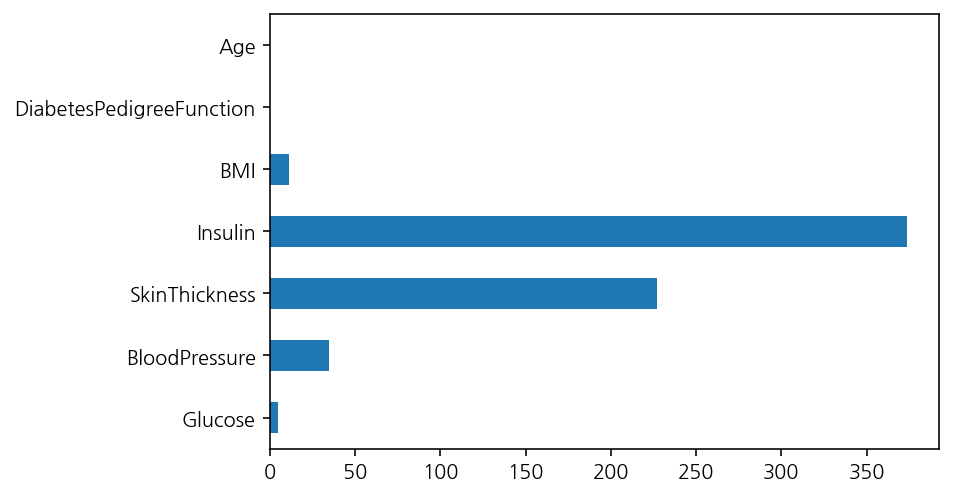

In [15]:
df_null.sum().plot.barh()

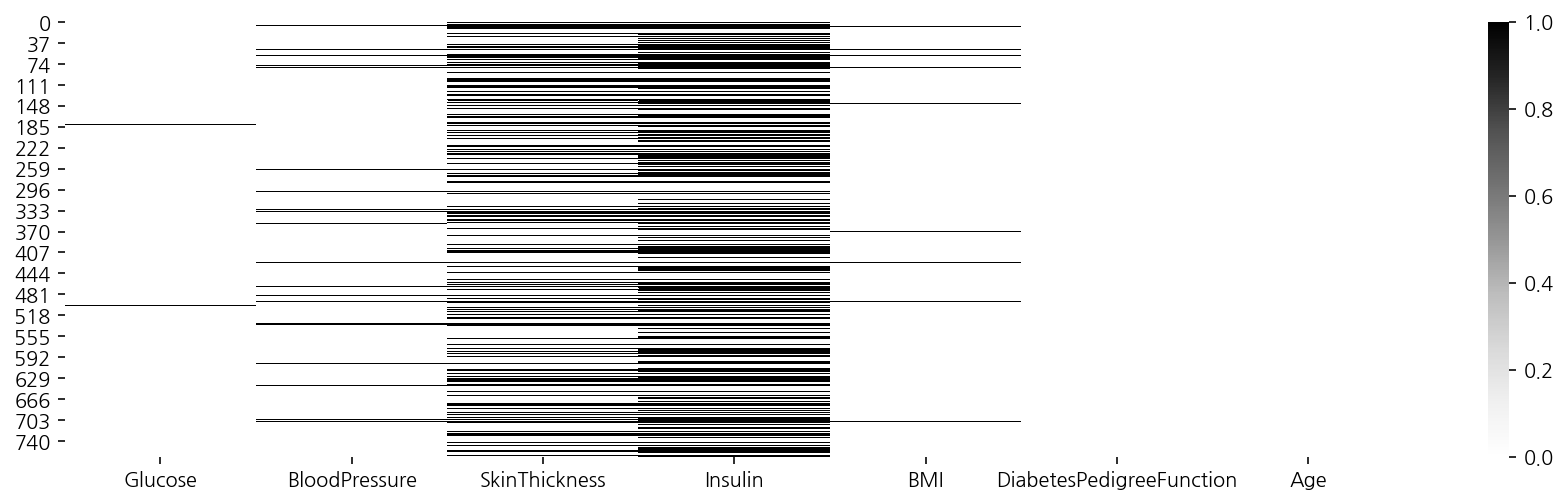

In [16]:
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys")

## 정답값

In [17]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [18]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [19]:
# 임신 횟수가 늘어날수록 당뇨병 발병 확률이 높아진다.
# 14회 이상 임신이면 당뇨병 무조건 확률 100인데, 이렇게 많이 임신하는 사람은 드물 것이라는 생각.
# reset_index() : 원래 있던 Pregnancies 인덱스를 컬럼으로 보내고 새로운 인덱스 순서대로 주어짐

df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

Pregnancies      mean  count
0             0  0.342342    111
1             1  0.214815    135
2             2  0.184466    103
3             3  0.360000     75
4             4  0.338235     68
5             5  0.368421     57
6             6  0.320000     50
7             7  0.555556     45
8             8  0.578947     38
9             9  0.642857     28
10           10  0.416667     24
11           11  0.636364     11
12           12  0.444444      9
13           13  0.500000     10
14           14  1.000000      2
15           15  1.000000      1
16           17  1.000000      1

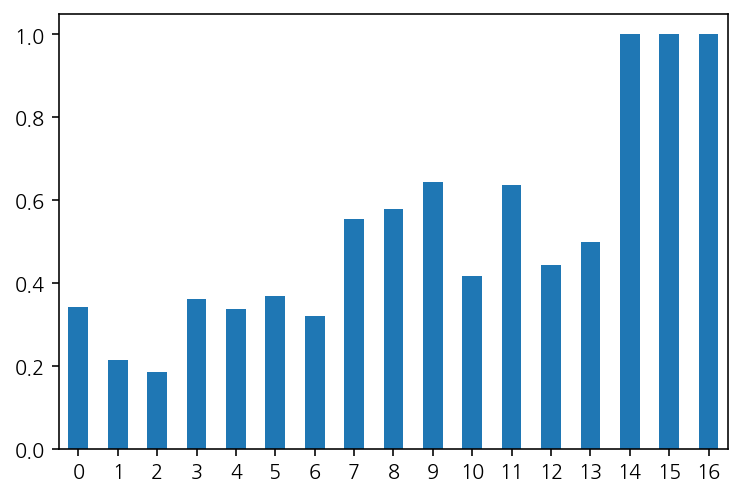

In [20]:
# 임신 횟수에 따른 당뇨병 발병 비율(평균)
df_po['mean'].plot.bar(rot=0)

## Countplot

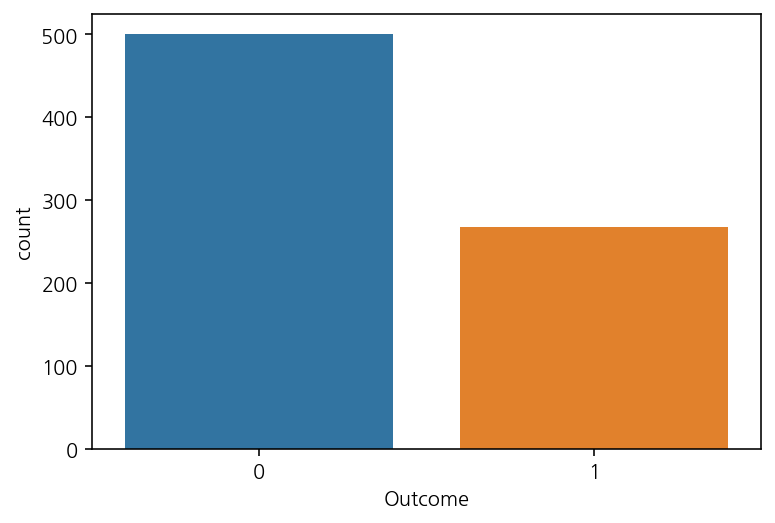

In [21]:
# 범주형 데이터
sns.countplot(data=df, x='Outcome')

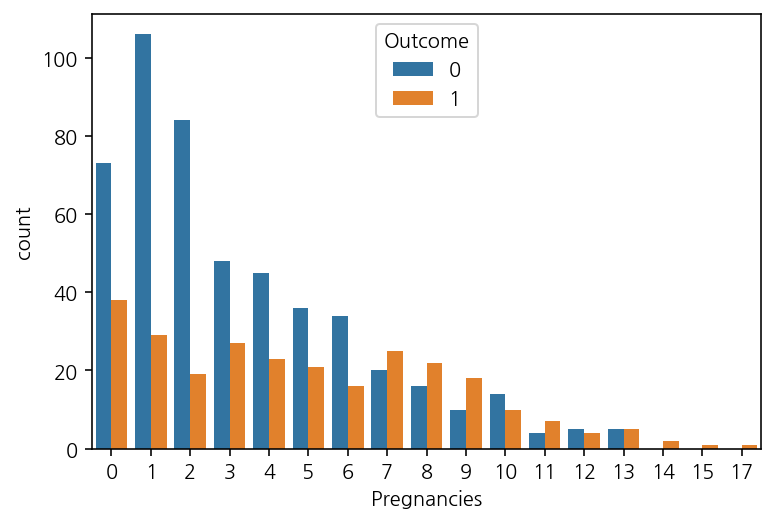

In [22]:
# 임신 횟수에 따른 당뇨병 발병 빈도수를 비교한다.
# 7번 넘어가면 Outcome이 1인 당뇨병 발병 경우가 더 많은 것을 확인할 수 있다.
# 0-17까지 임신 횟수. 숫자가 범위가 넓게 되면 조건이 점점 많아지게 되어 overfitting 될 수 있다. 특히 저 아래 빈도가 적은 경우.
# dummy 변수로 처리?? 에서 같은 고민.
# 이럴 때는 범주화해서 포함한다. 특정 횟수 이상 이하

sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [23]:
# 임신횟수의 많고 적음에 따라 
# 연속 데이터 -> 범주형 데이터

df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies','Pregnancies_high']]

Pregnancies  Pregnancies_high
0              6             False
1              1             False
2              8              True
3              1             False
4              0             False
..           ...               ...
763           10              True
764            2             False
765            5             False
766            1             False
767            1             False

[768 rows x 2 columns]

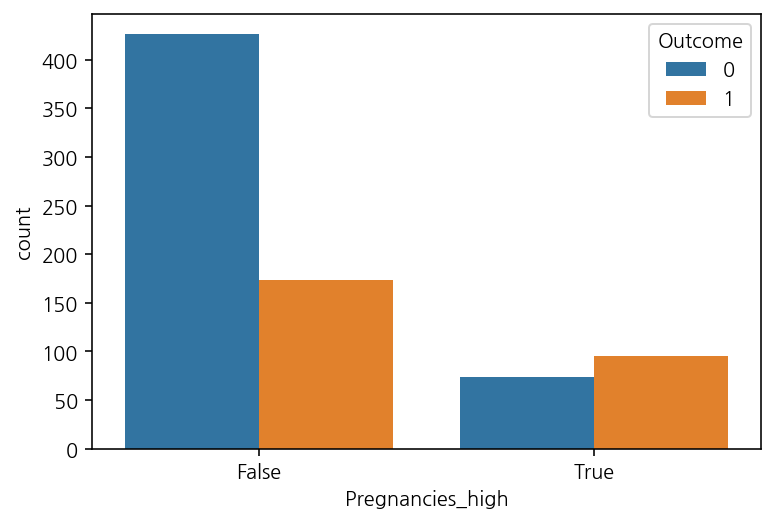

In [24]:
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

# 임신 횟수가 낮은 집단에서는 당뇨병이 발병 횟수가 아닌 횟수보다 적은데, 임신 횟수가 높은 집단에서는 당뇨병 발병 빈도가 아닌 것보다 높다

## Barplot

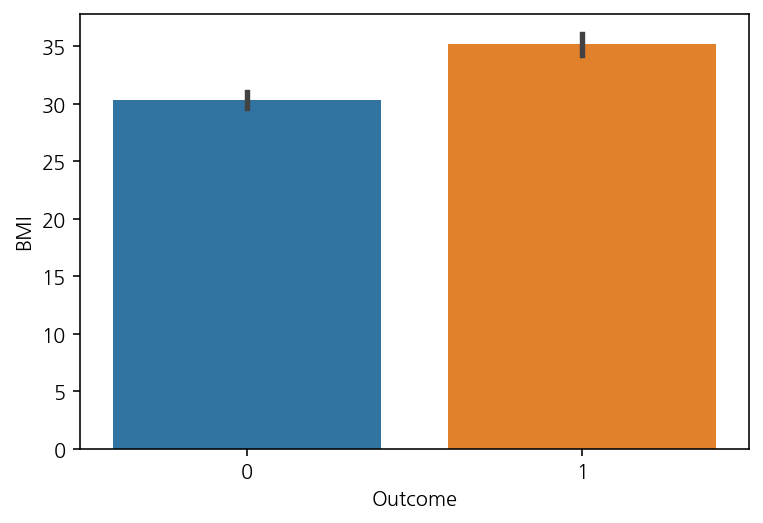

In [25]:
# 당뇨병 발병에 따른 BMI 수치를 비교

sns.barplot(data=df, x='Outcome', y='BMI')

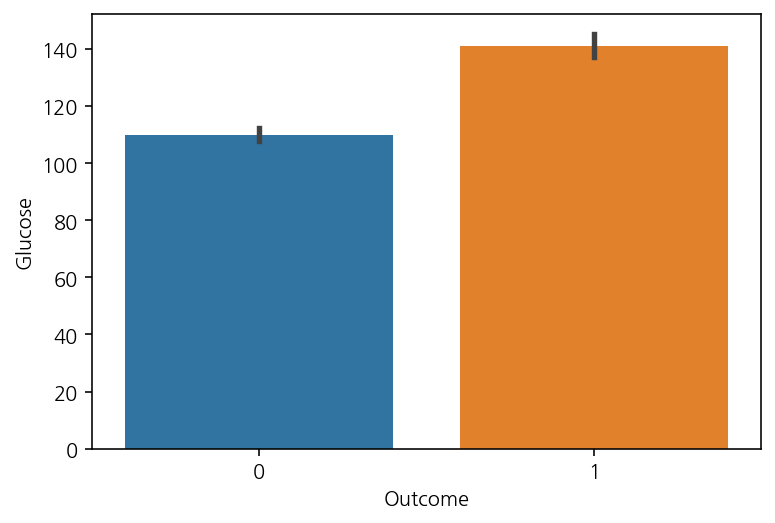

In [26]:
# 당뇨병 발병에 따른 포도당 수치를 비교

sns.barplot(data=df, x='Outcome', y='Glucose')

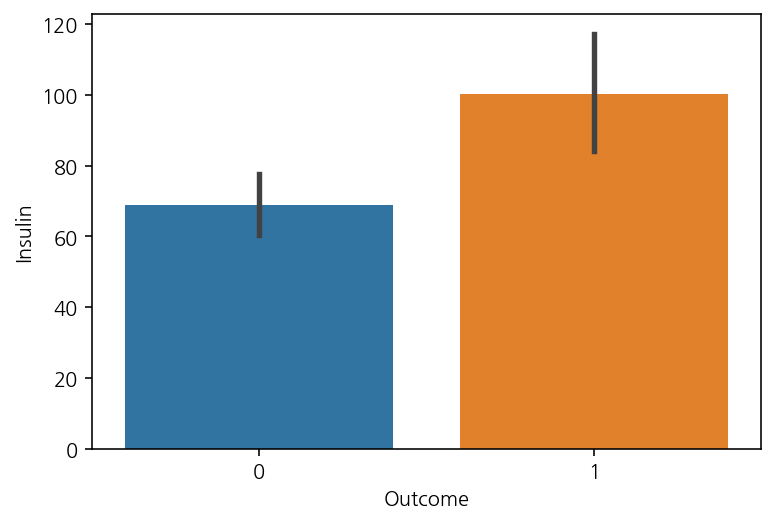

In [27]:
# estimator = mean 기본값
# 당뇨병 있는 사람들은 인슐린 수치 더 높다.
# 데이터 95%신뢰구간이 검은 선으로 나타난 것.
# 신뢰구간 차이가 좀 크게 나타나고 있다.

sns.barplot(data=df, x='Outcome', y='Insulin')

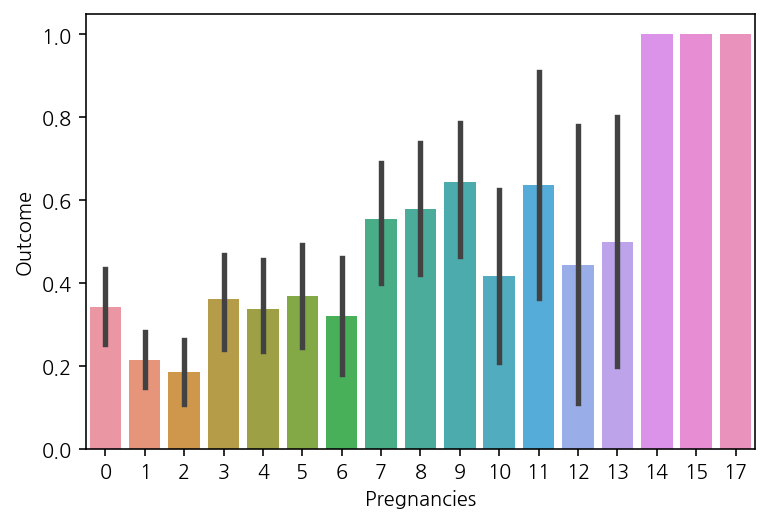

In [28]:
# 임신횟수에 대해서 당뇨병 발병 비율 계산

sns.barplot(data=df, x='Pregnancies', y='Outcome')

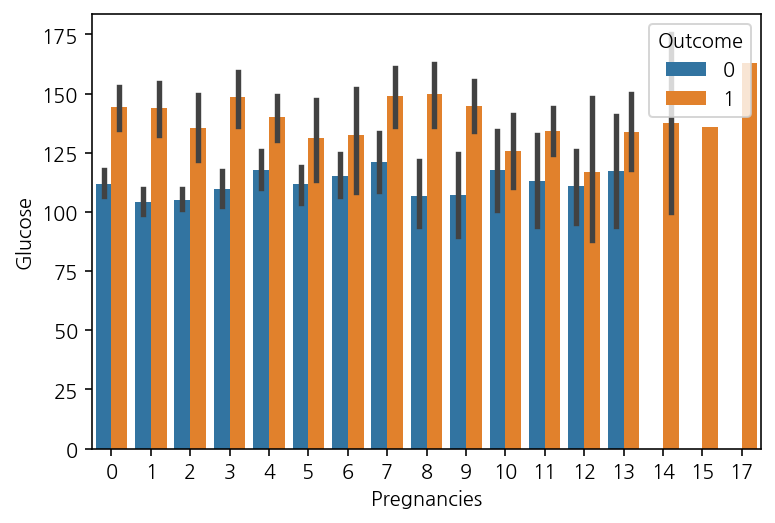

In [29]:
# 임신 횟수에 따른 포도당 수치를 당뇨병 발병여부에 따라서 시각화
# Glucose 수치도 당뇨병 발병 여부에 따라 차이가 있다.

sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

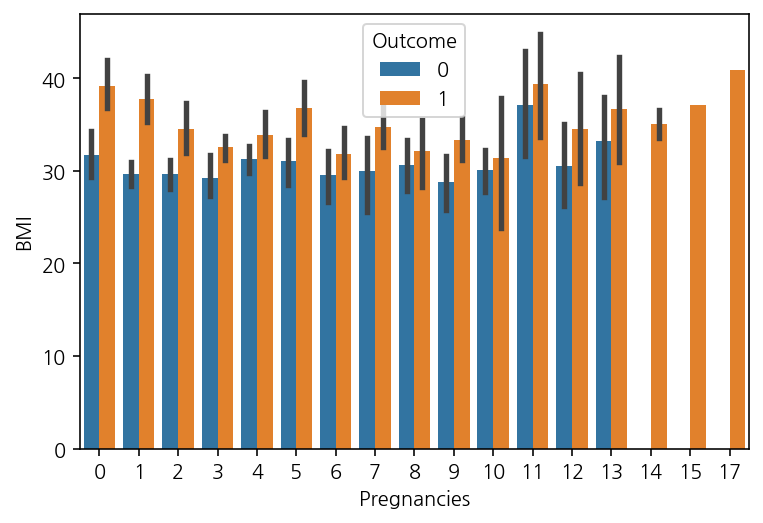

In [30]:
# 임신 횟수에 따른 체질량지수를 당뇨병 발병여부에 따라서 시각화
# BMI 지수도 당뇨병 발병한 사람들이 더 높다.

sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

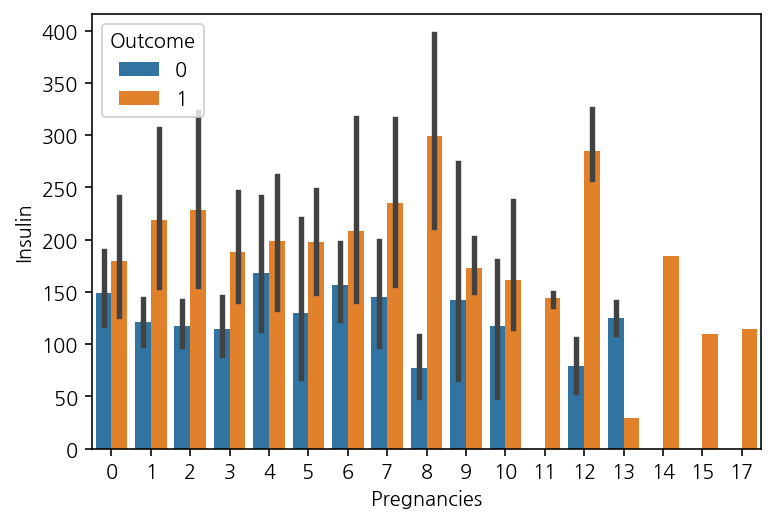

In [31]:
# 임신 횟수에 따른 인슐린 수치를 당뇨병 발병여부에 따라서 시각화
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그린다.
# 인슐린이 0보다 큰 애들로

sns.barplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## Boxplot

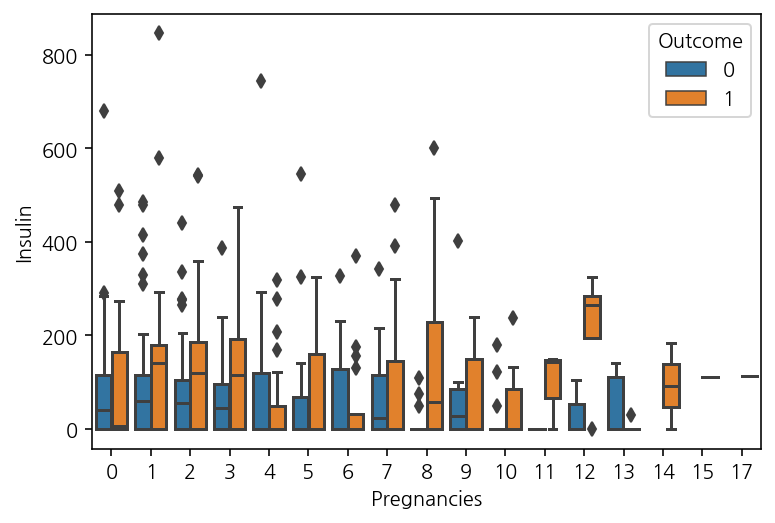

In [32]:
# boxplot이 주저앉아 있는 경우 예컨데 12 13에서 Outcome이 0인 경우에서, 이 경우는 인슐린 값이 0인 경우가 많기 때문이다.
# 아까 0으로 된 경우 많다고 봤었다.

sns.boxplot(data=df, x='Pregnancies', y='Insulin', hue='Outcome')

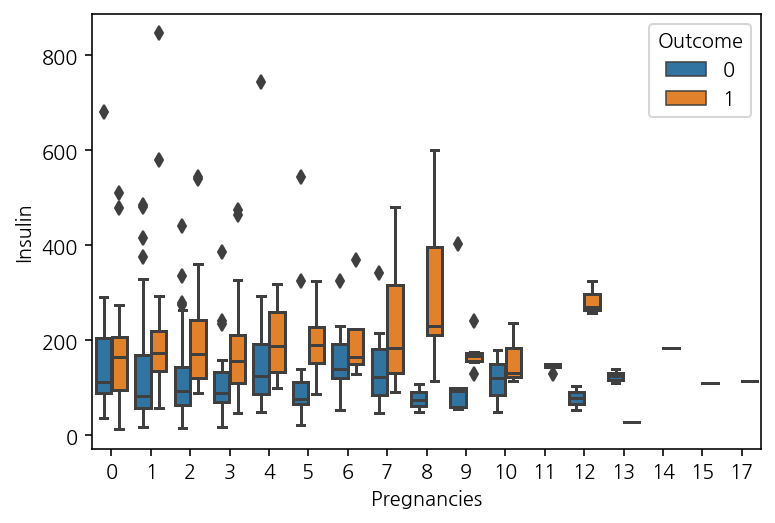

In [33]:
# 그래서 인슐린이 0보다 큰 값만 가지고 와서 그린다.
# 당뇨병 발병하는 사람들이 인슐린 수치가 높고
# 임신 횟수가 늘어갈수록 차이가 좀 더 크게 나타남을 볼 수 있다.

sns.boxplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## Violinplot

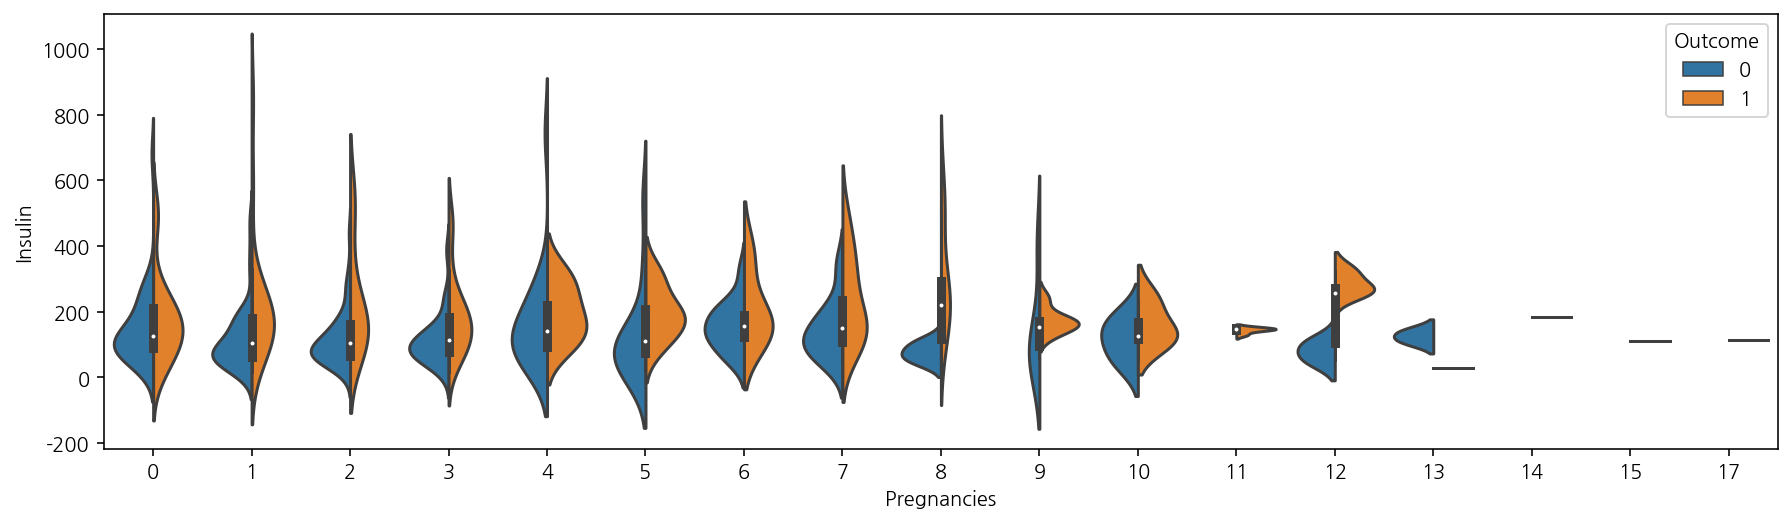

In [65]:
# boxplot은 네모 안의 분포를 확인하기 쉽지 않은데, 이건 그것의 단점을 보완

plt.figure(figsize=(15,4))
plt.rc('axes', unicode_minus=False)
sns.violinplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

## Swarmplot

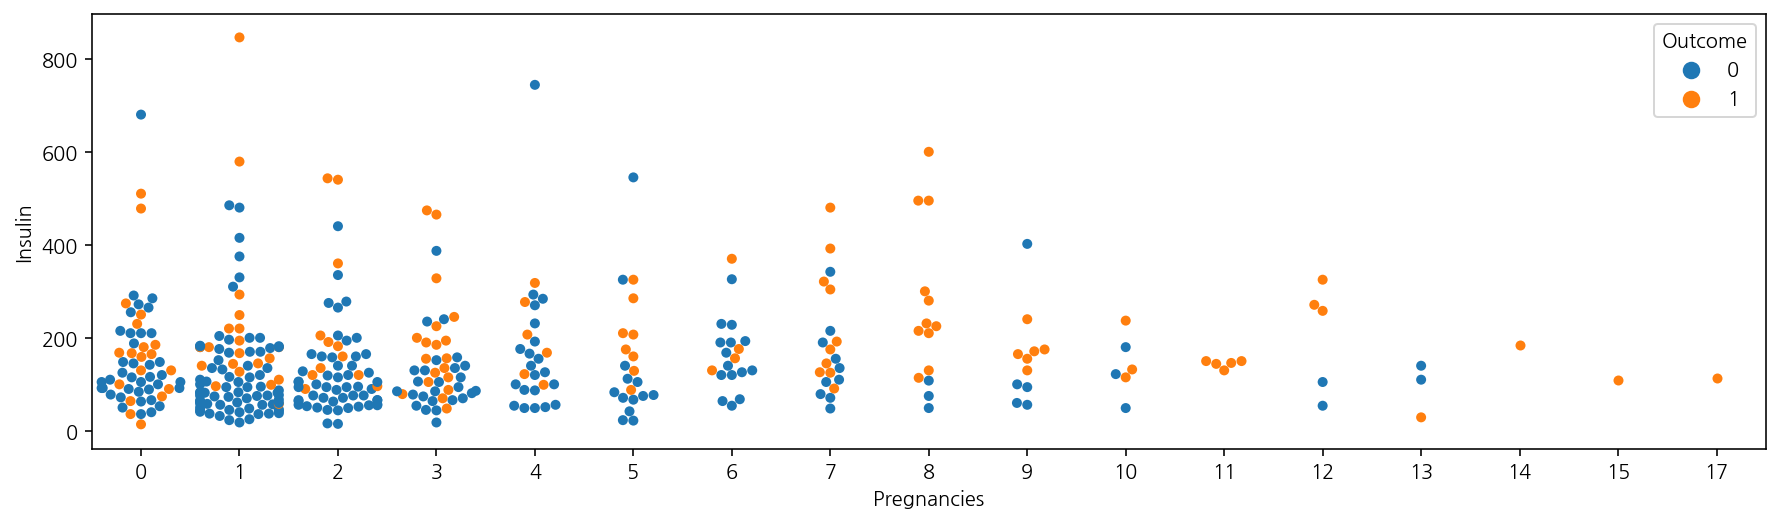

In [35]:
# 범주형 산점도
# 모수 적은 데이터도 확인해볼 수 있음.
# 임신 횟수가 늘어날수록 데이터 수 줄어듦.

plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df['Insulin']>0], x='Pregnancies', y='Insulin', hue='Outcome')

## Distplot

In [36]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

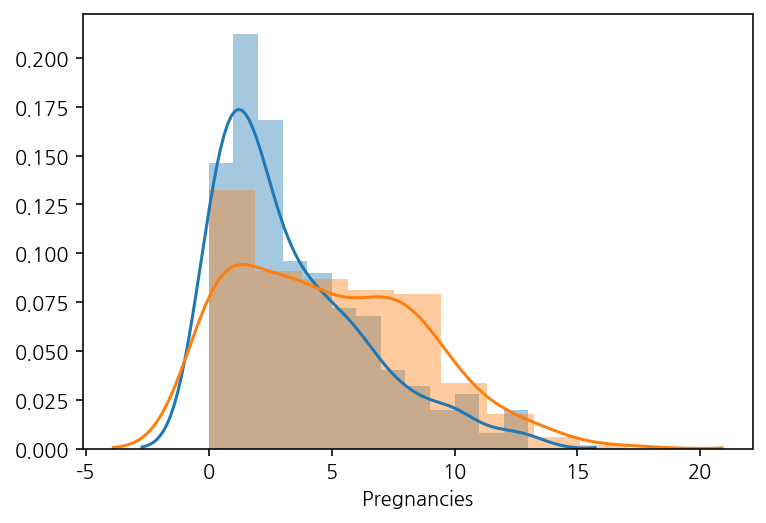

In [66]:
# 임신 횟수에 따른 당뇨병 발병 여부
plt.rc('axes', unicode_minus=False)
sns.distplot(df_0['Pregnancies'])
sns.distplot(df_1['Pregnancies'])

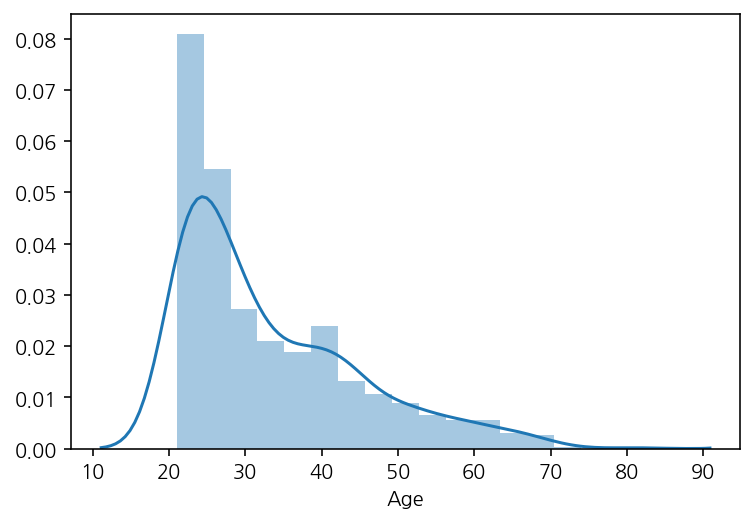

In [38]:
sns.distplot(df['Age'])

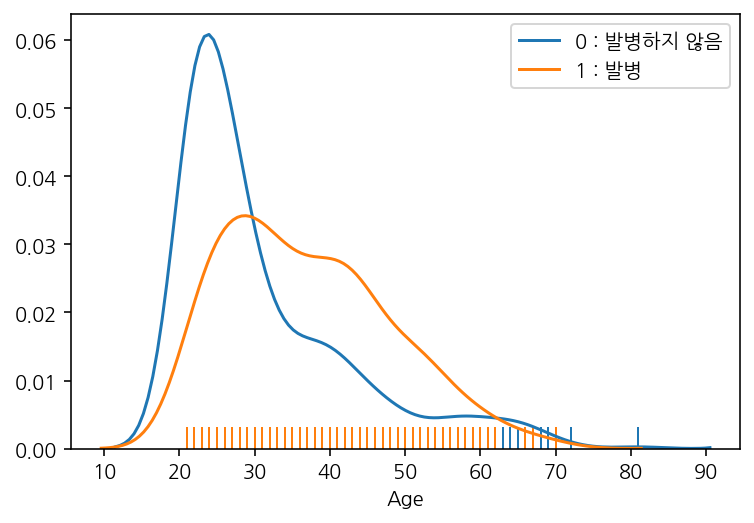

In [39]:
# 나이에 횟수에 따른 당뇨병 발병 여부
# 30세 이후로 발병하는 케이스가 더 늘어남을 확인할 수 있다. : 범주화해서 만들 수도 있다.

sns.distplot(df_0['Age'], hist=False, rug=True, label='0 : 발병하지 않음')
sns.distplot(df_1['Age'], hist=False, rug=True, label='1 : 발병')

## Subplot

### Pandas를 통한 histplot 그리기

In [40]:
# histplot : boolean 값 지원 x

df['Pregnancies_high']=df['Pregnancies_high'].astype(int)
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  
0                       0.627   50        1                 0  
1                       0.351   31        0                 0  
2                       0.672   32        1                 1  
3                       0.167   21        0                 0  
4                       2.288   33        1                 0  
..                        ...  ...      ...               ...  
763                     0.171   63        0                 1  
764                     0.340   27        0                 0  
765                     0.245   30        0                 0  
766                     0.349   47        1                 0  
767                     0.315   23        0                 0  

[768 rows x 10 columns]

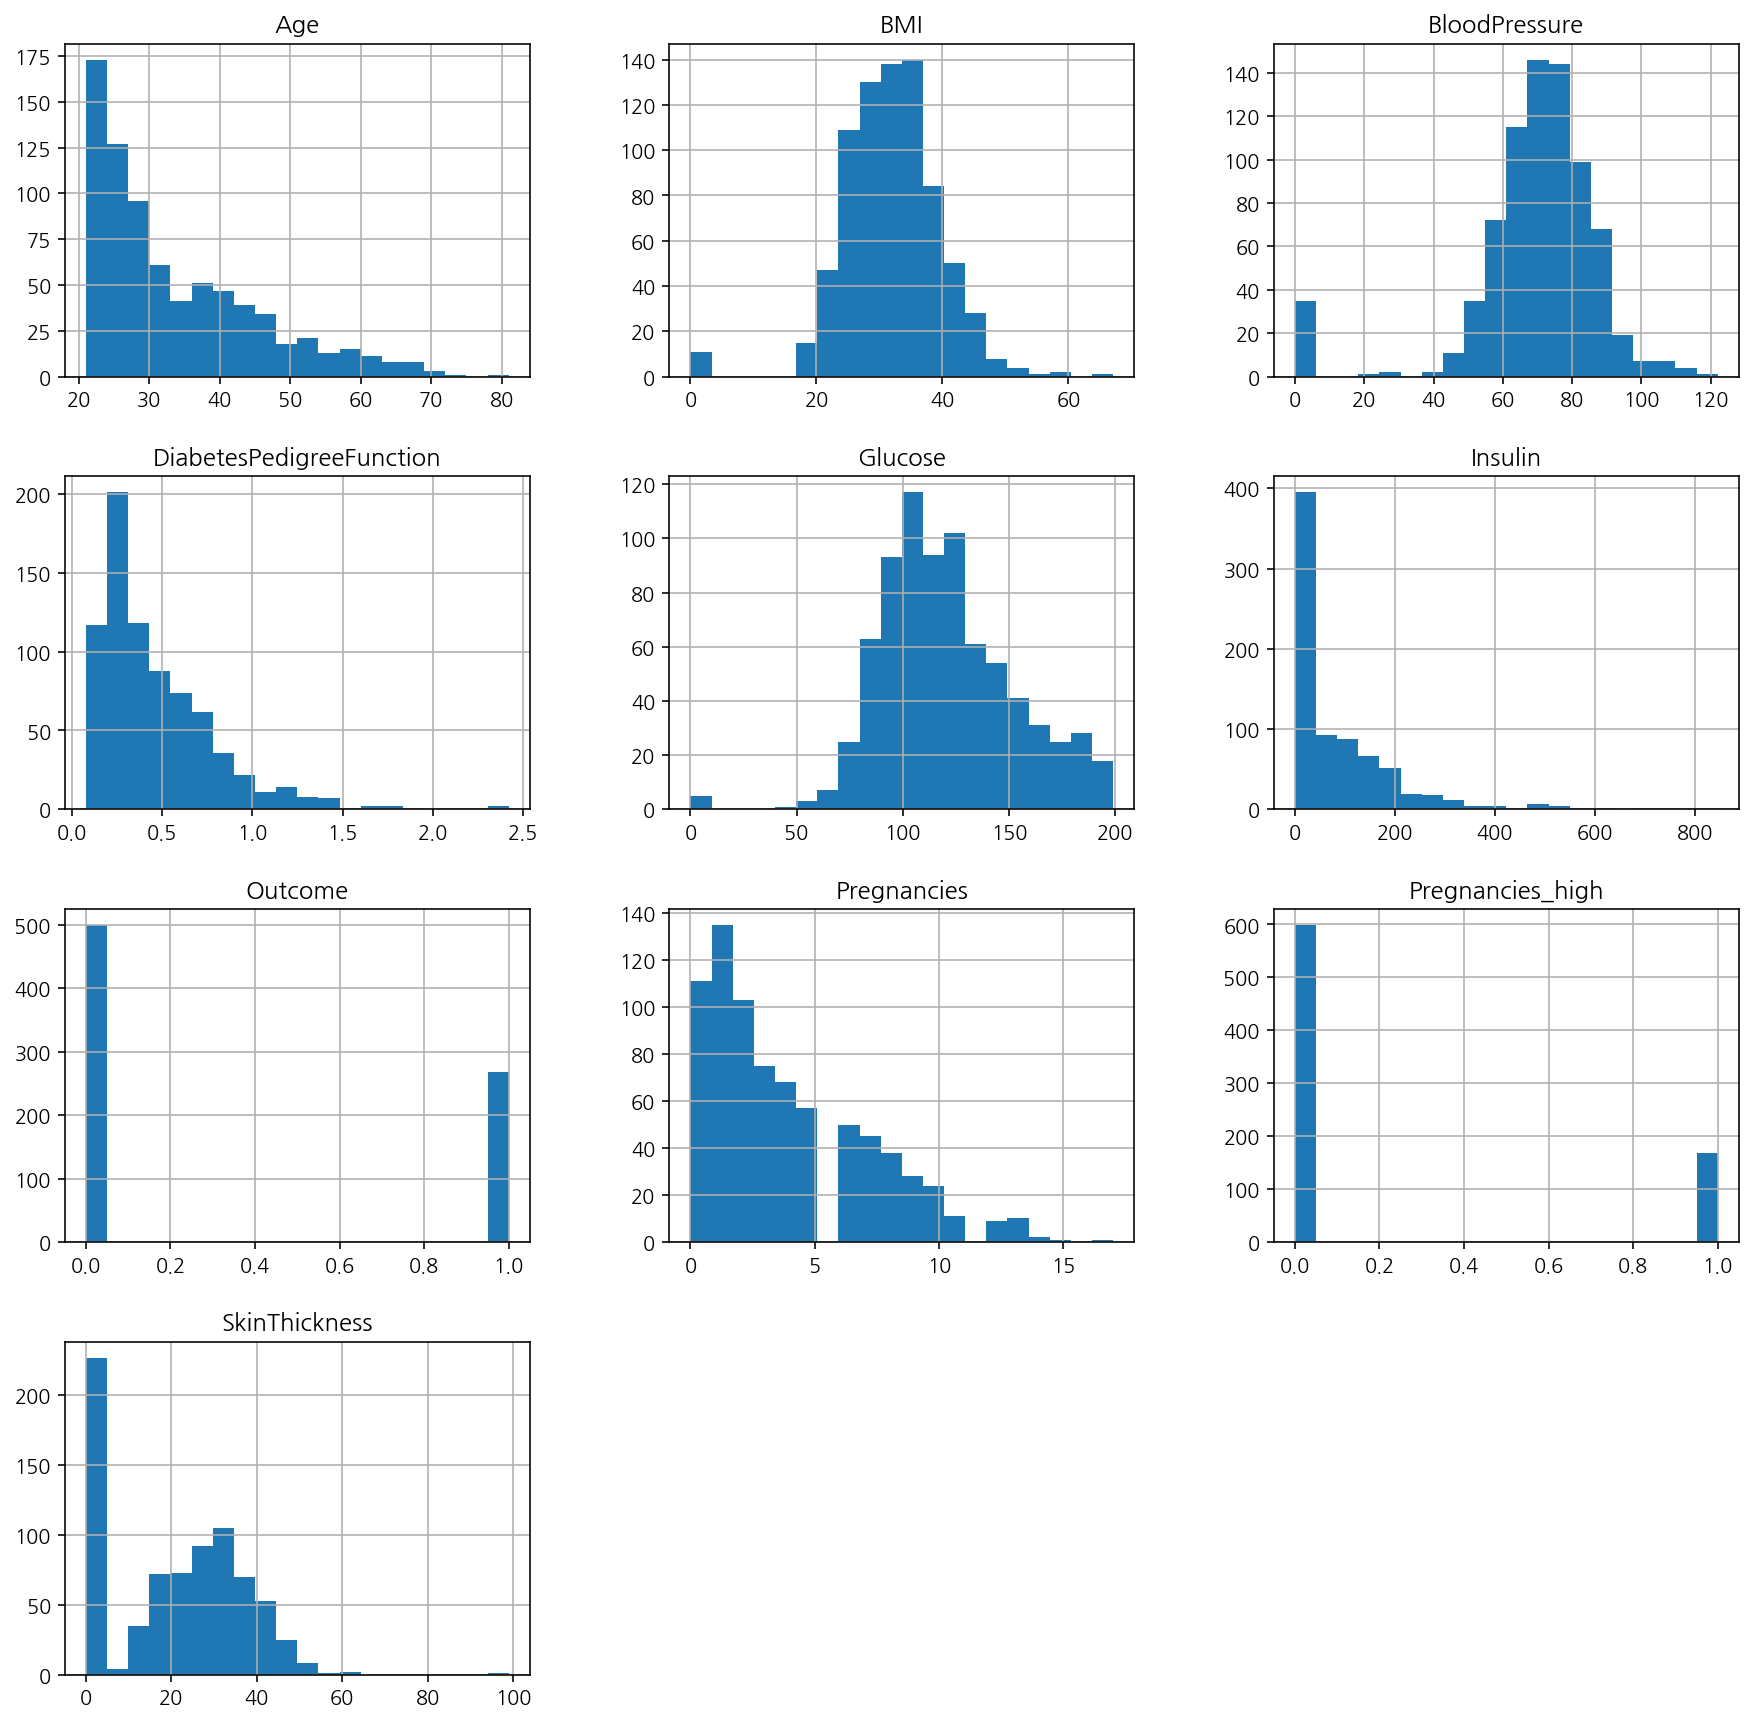

In [41]:
h = df.hist(figsize=(15,15), bins=20)

### 반복문을 통한 서브플롯 그리기

#### distplot

In [42]:
col_num = df.columns.shape
col_num

(10,)

In [43]:
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

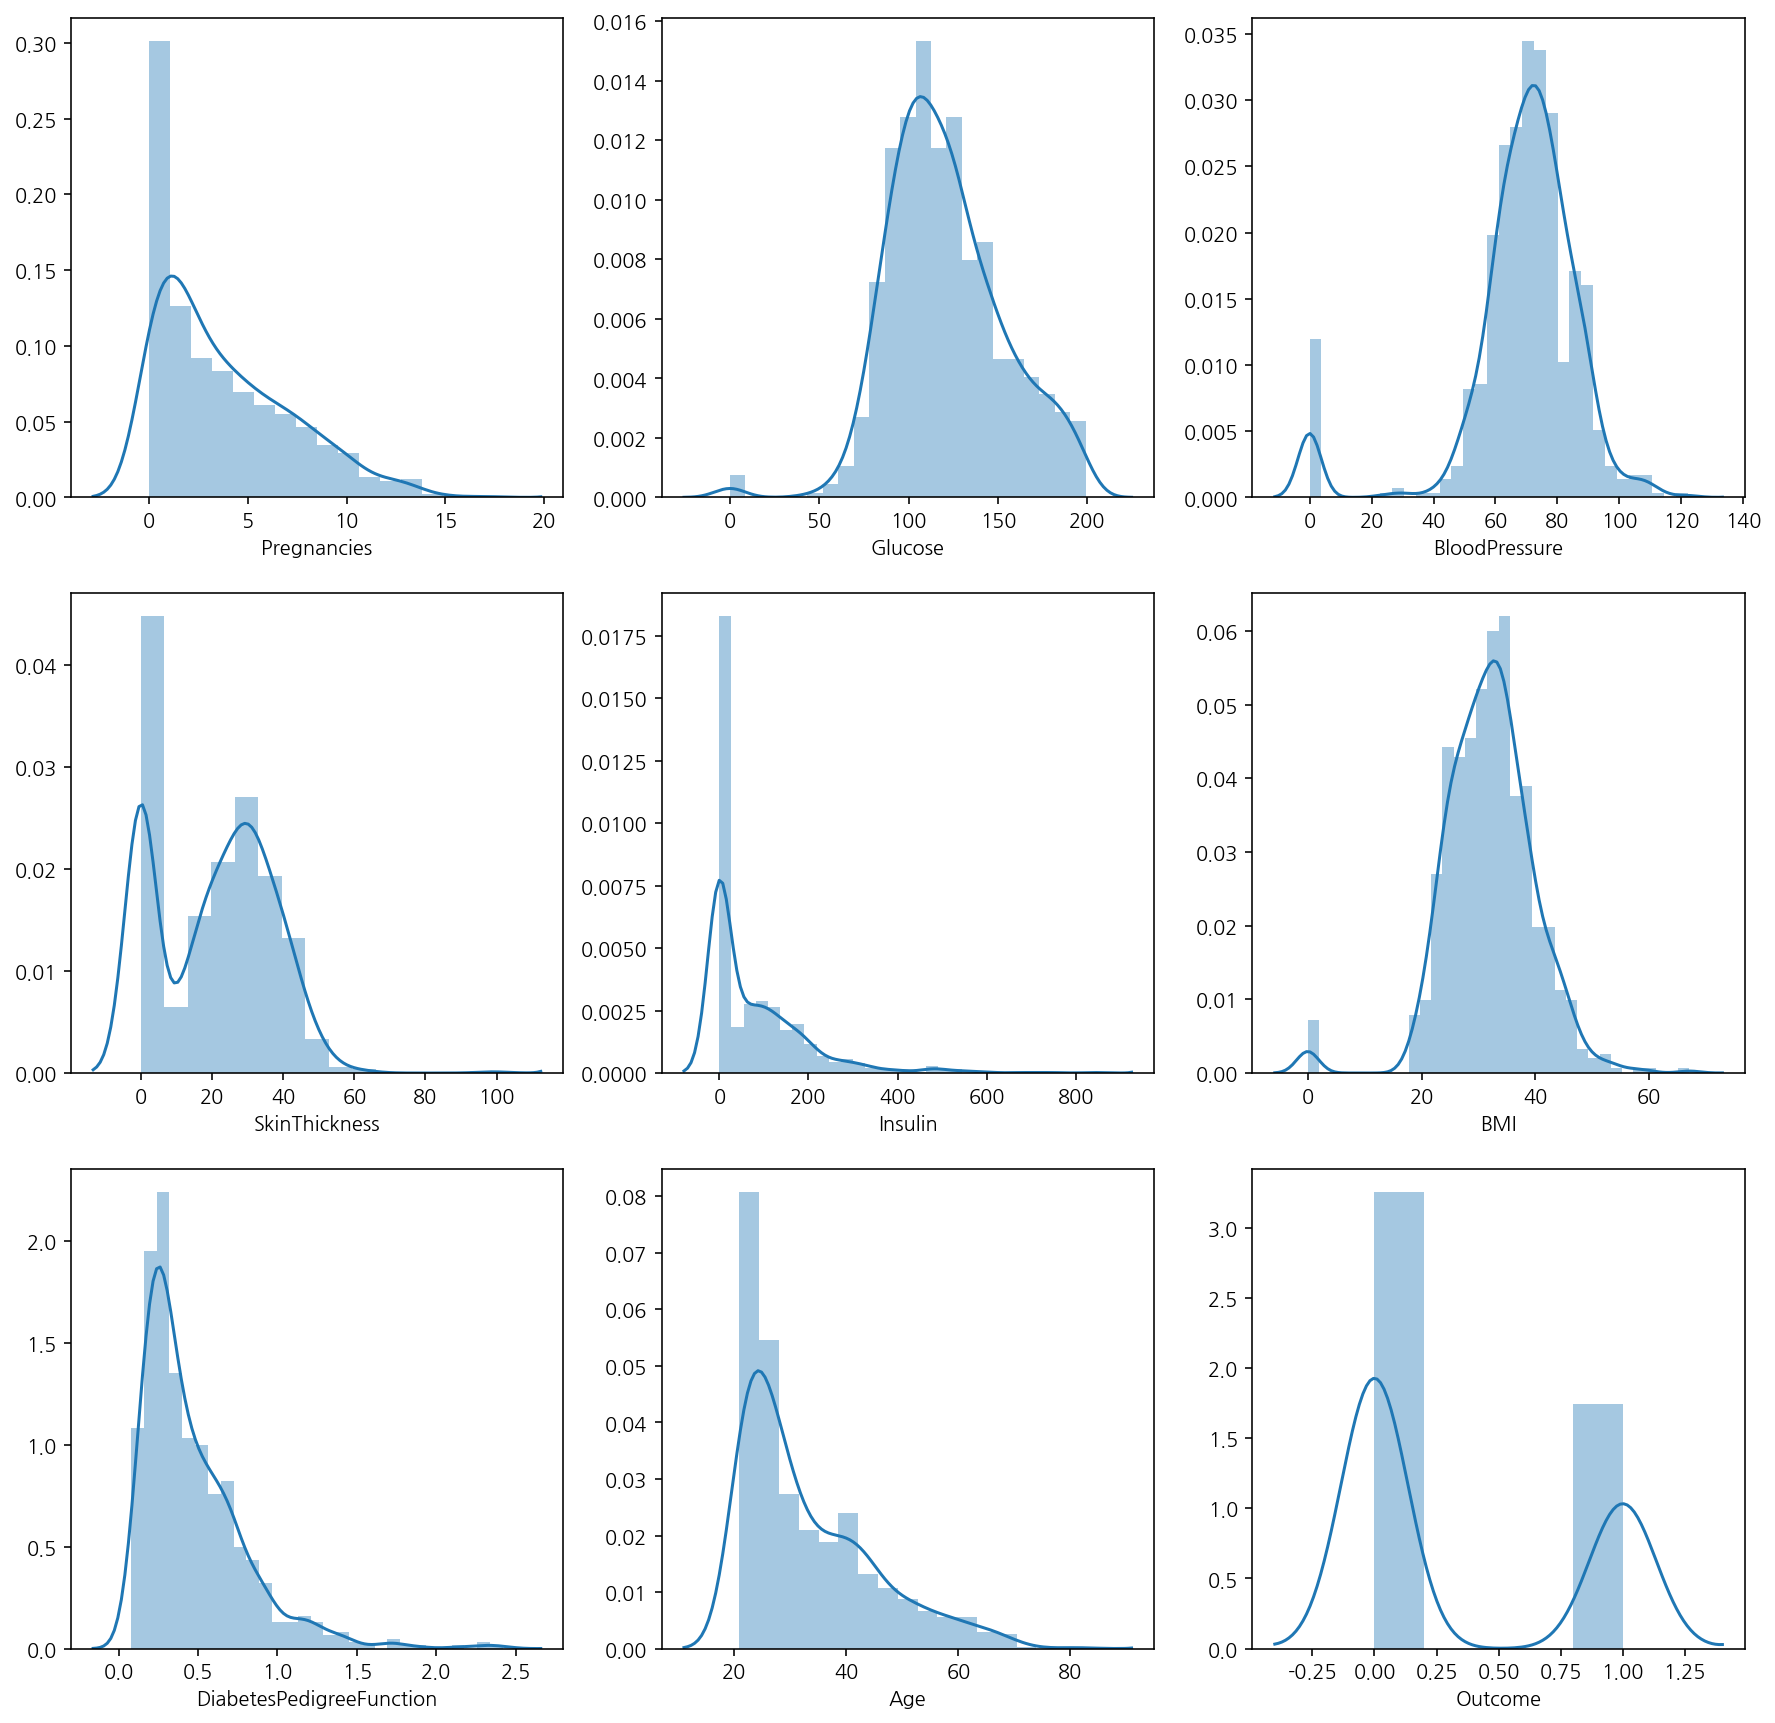

In [44]:
# 변수 할당해주면 깔끔하게 그려짐
# // 소수점 제외하고 나누기
# % 나머지
# distplot은 적분했을 때 1이 되는 값을 y축에 표시해준다.

plt.rc('axes', unicode_minus=False)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])
    
# sns.distplot(df['Outcome'], ax=axes[0][0]) # ax=axes[][] : 그래프 어디 들어갈지 위치 지정 가능

In [45]:
df_0

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
1              1       85             66             29        0  26.6   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
7             10      115              0              0        0  35.3   
10             4      110             92              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  Pregnancies_high  
1                       0.351   31        0             False  
3                       0.167   21        0             False  
5                       0.201   30        0             False  
7                       0.134   29        0              True  
10                      0.191   30        0             False  
..                        ...  ...      ...               ...  
762                     0.142   33        0              True  
763                     0.171   63        0              True  
764                     0.340   27        0             False  
765                     0.245   30        0             False  
767                     0.315   23        0             False  

[500 rows x 10 columns]

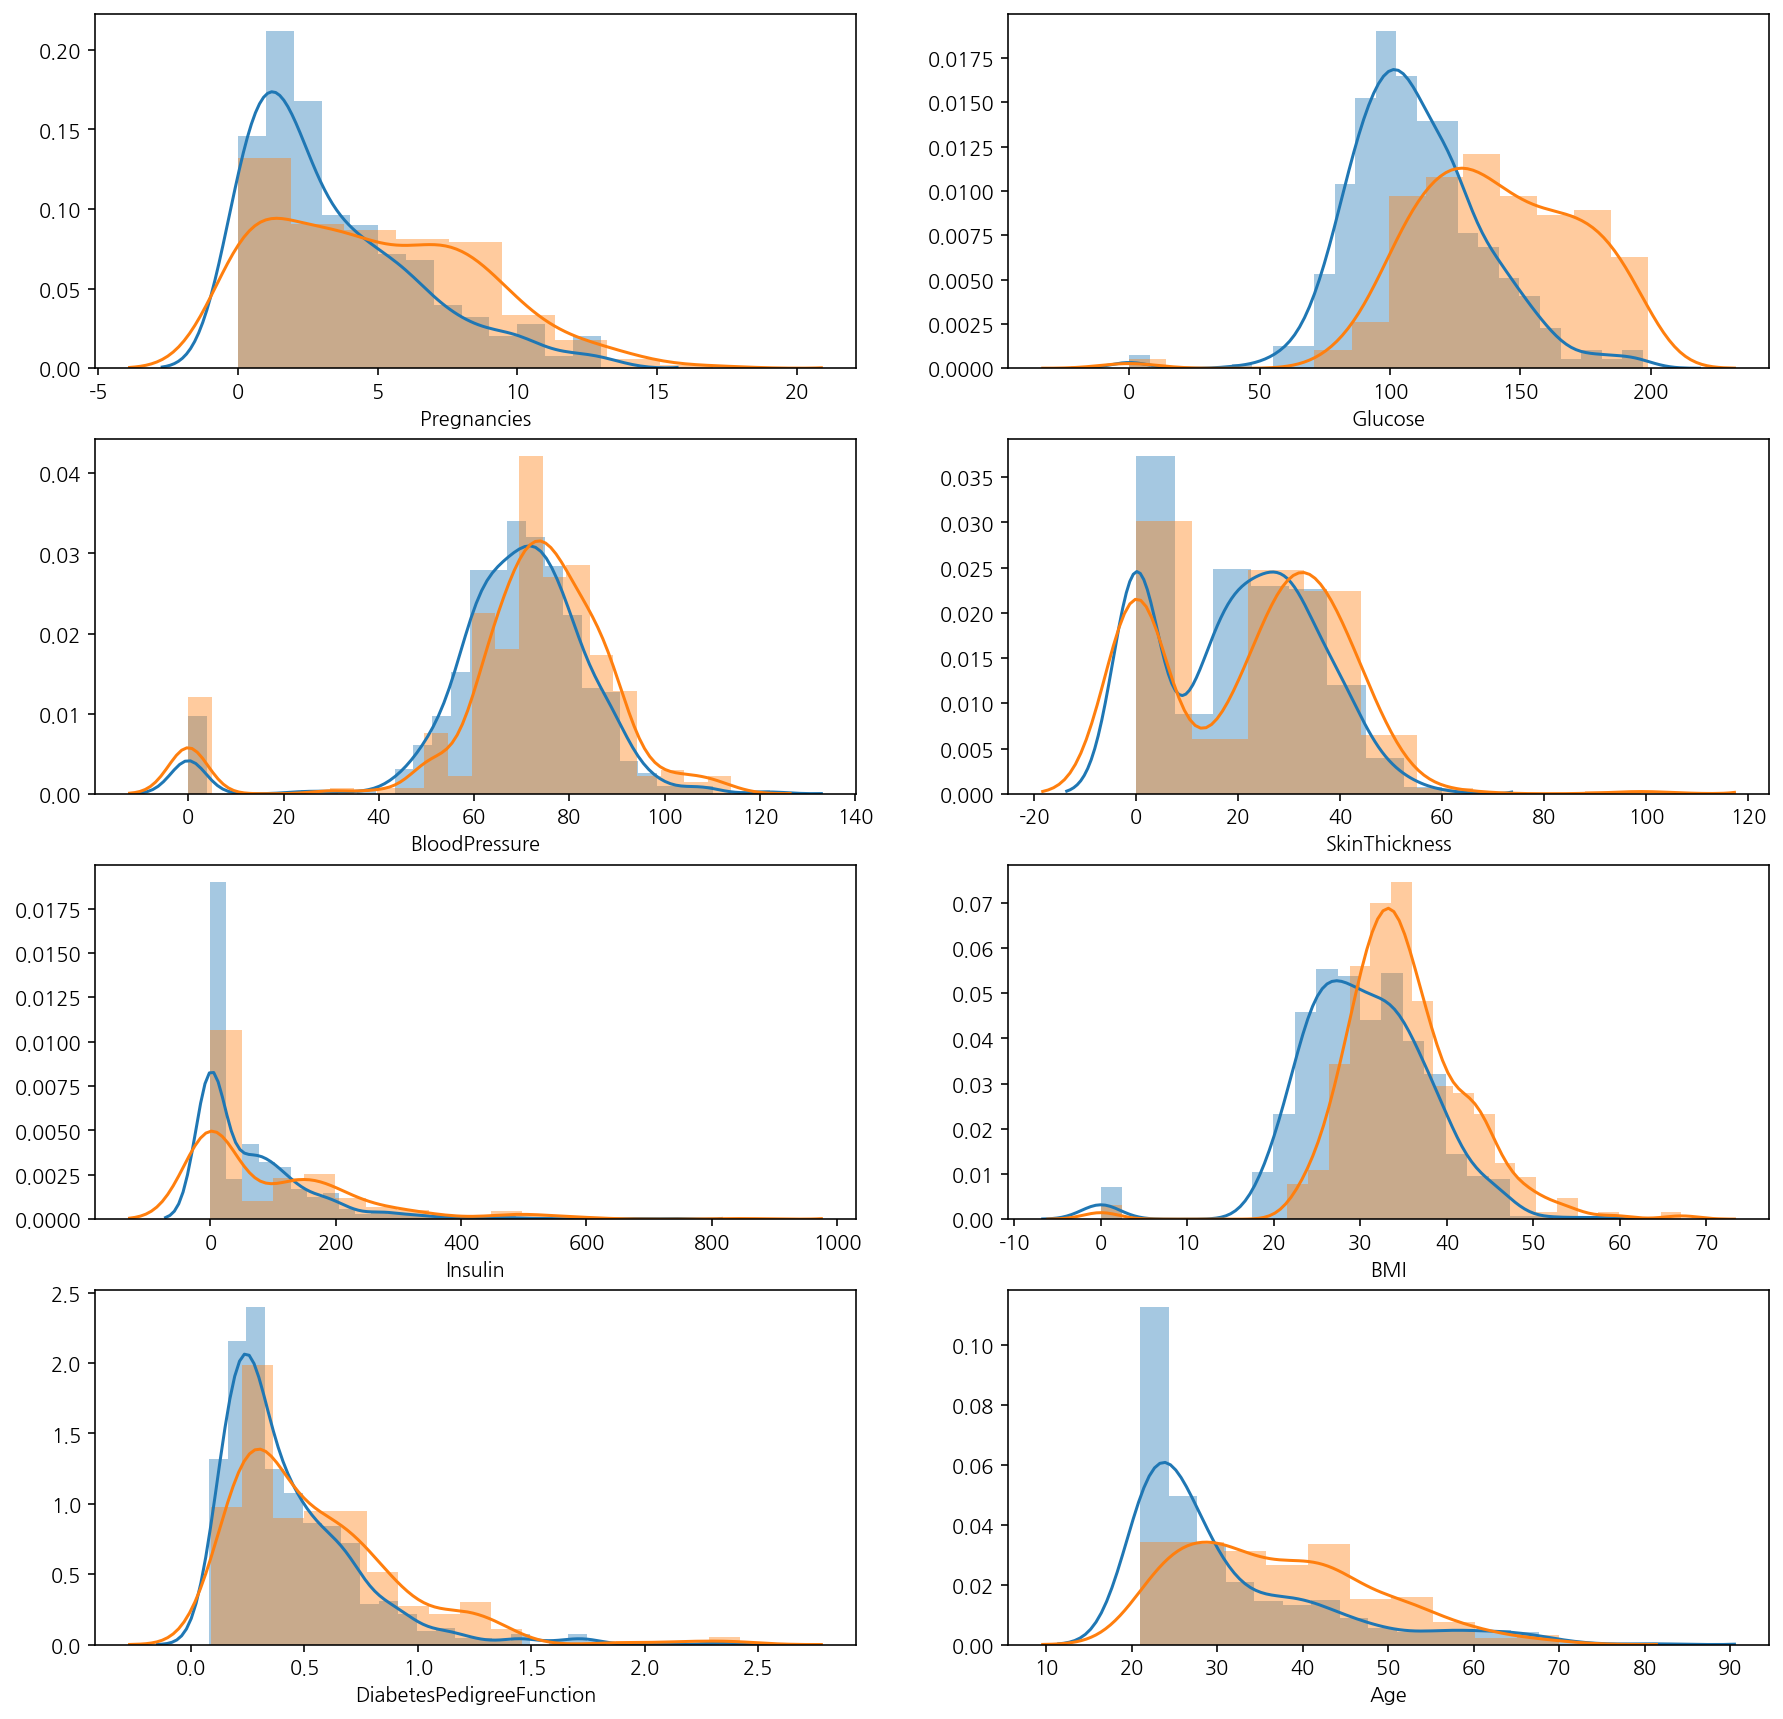

In [46]:
# Outrcome 값이 있느냐 없느냐로
# 특정값을 기준으로 Outcome 얼마나 달라지냐 아니냐 보면서 범주화할 수 있다.

plt.rc('axes', unicode_minus=False)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15)) # Pregnancies부터 Age 까지 그릴 것이다.

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

#### violinplot

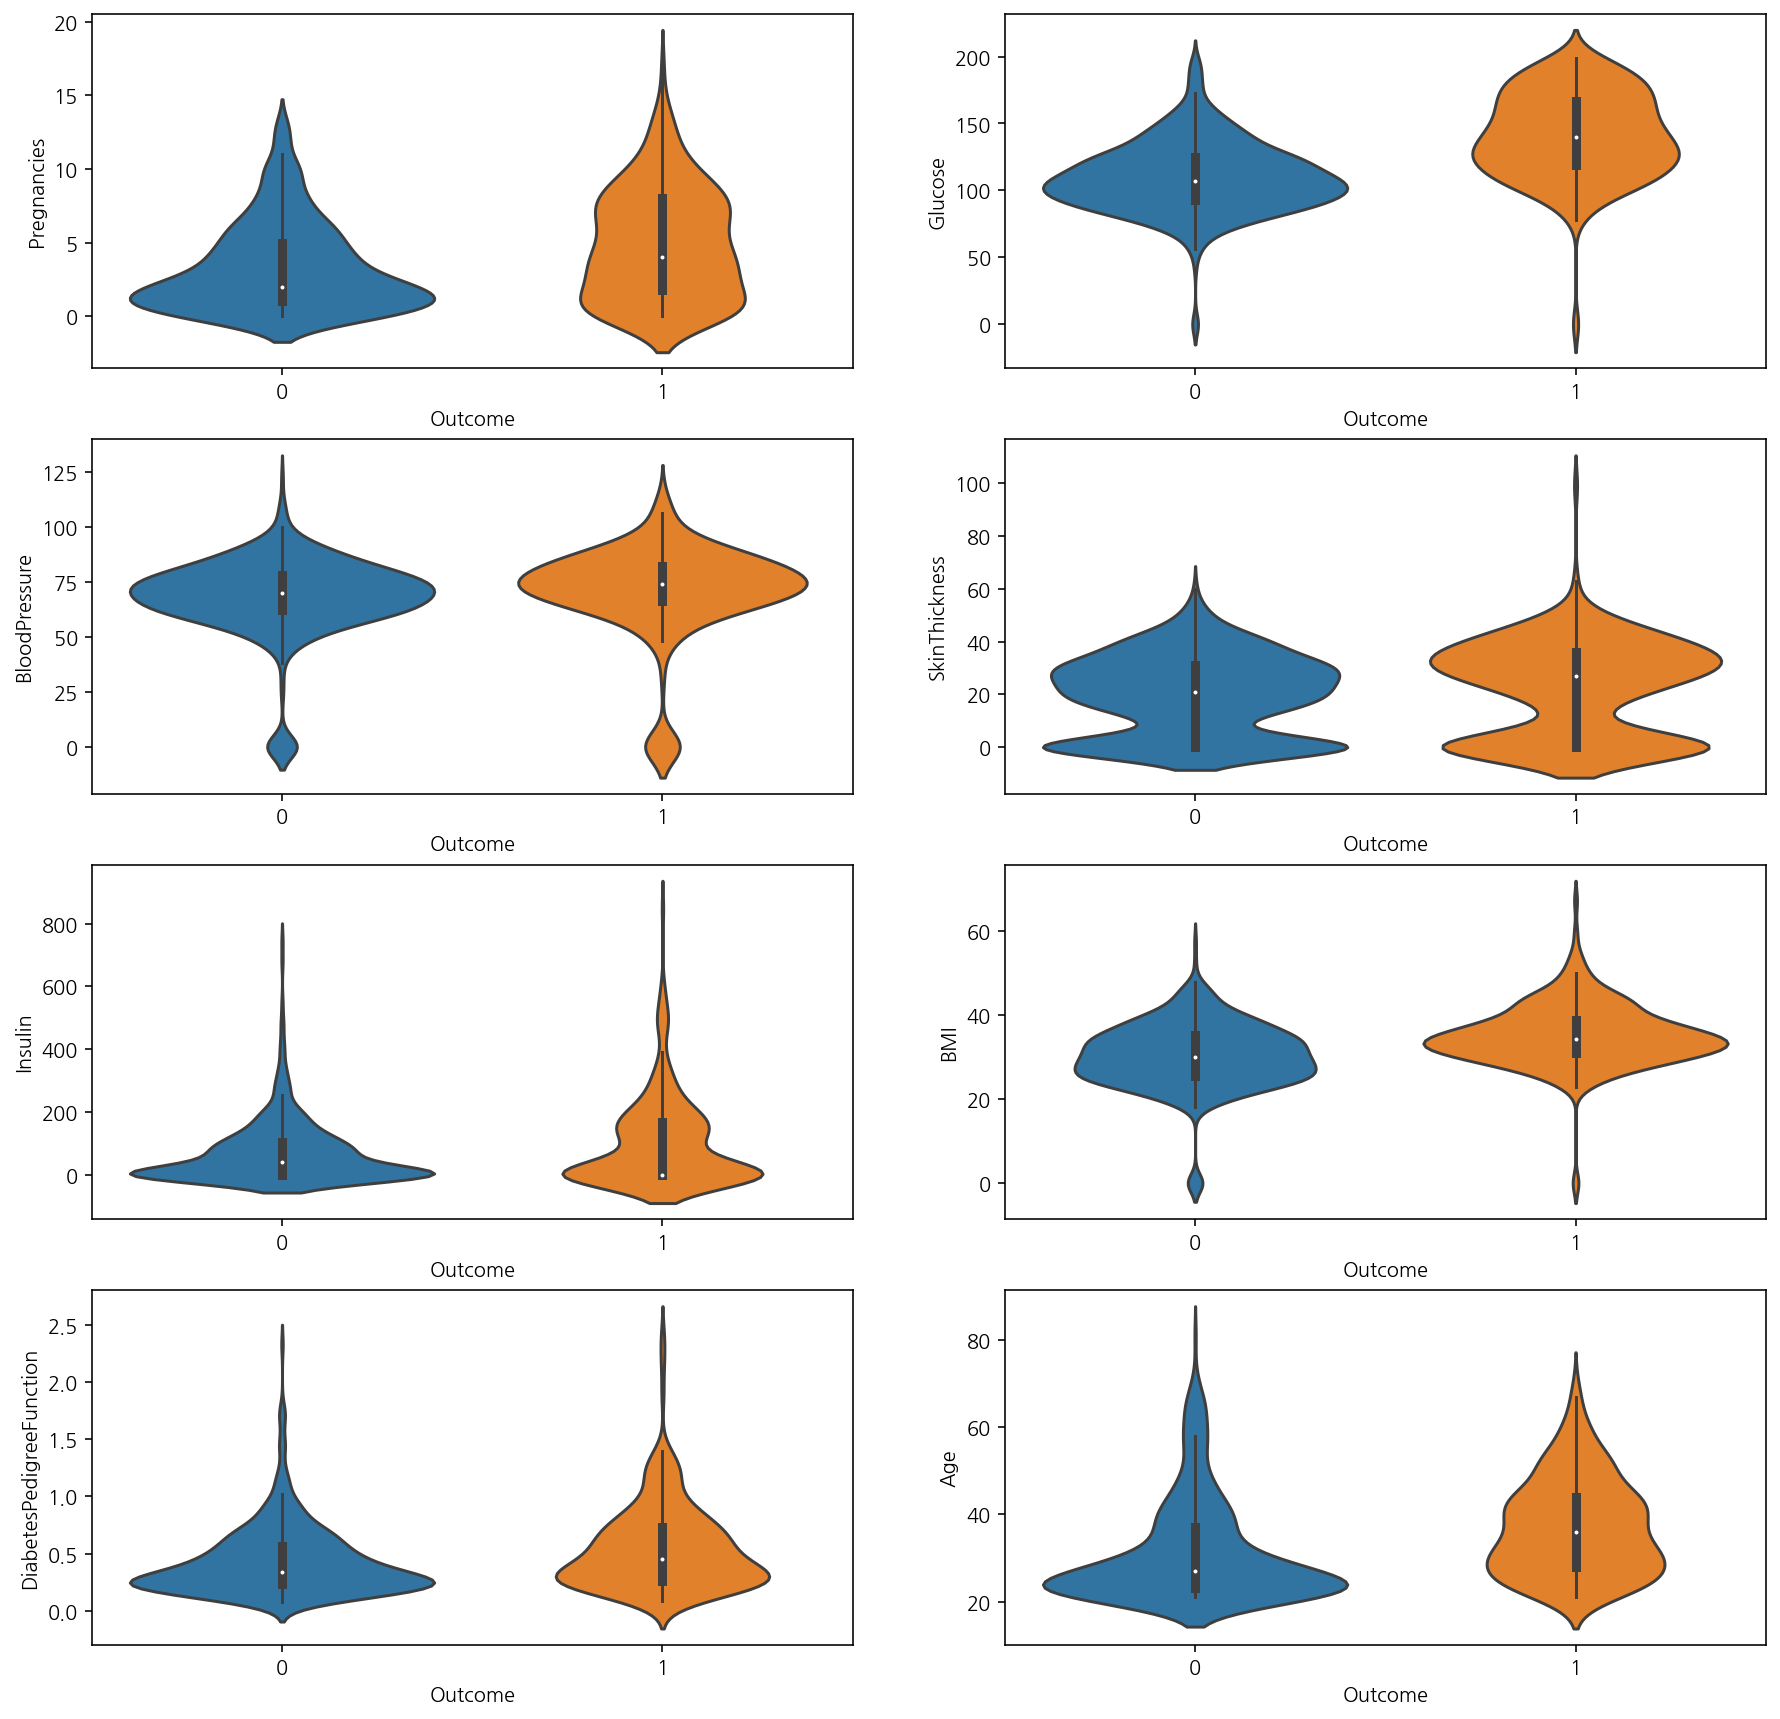

In [47]:
# x축의 발병여부에 따라 다른 변수들이 어떤 차이를 보이고 있는지 알 수 있음.
# 0에 값이 많이 몰려있는 애들, 결측치 많은 애들
# 결측치를 바꿔준 데이터를 통해 시각화 해보는 방법도
# Glucose, Insulin 등이 예측할 때 우리의 도메인 지식으로는 중요하다는 생각

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15)) # Pregnancies부터 Age 까지 그릴 것이다.

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df,x='Outcome',y=col_name, ax=axes[row][col])

#### lmplot

글루코스와 인슐린은 상관계수가 높을 것 같다.

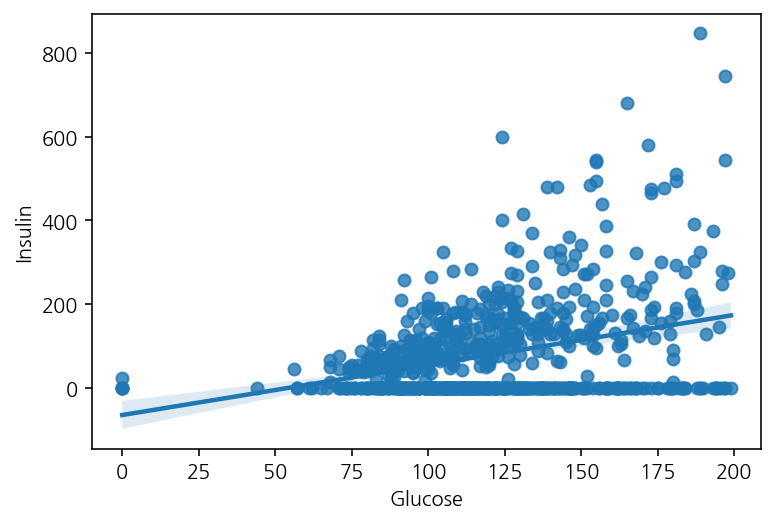

In [48]:
# Insulin값이 0이 너무 많아서 회귀선이 0에 가깝게 그려짐
# regplot은 색깔 다르게 지정하는거 할 수 없음.

sns.regplot(data=df, x='Glucose', y='Insulin')

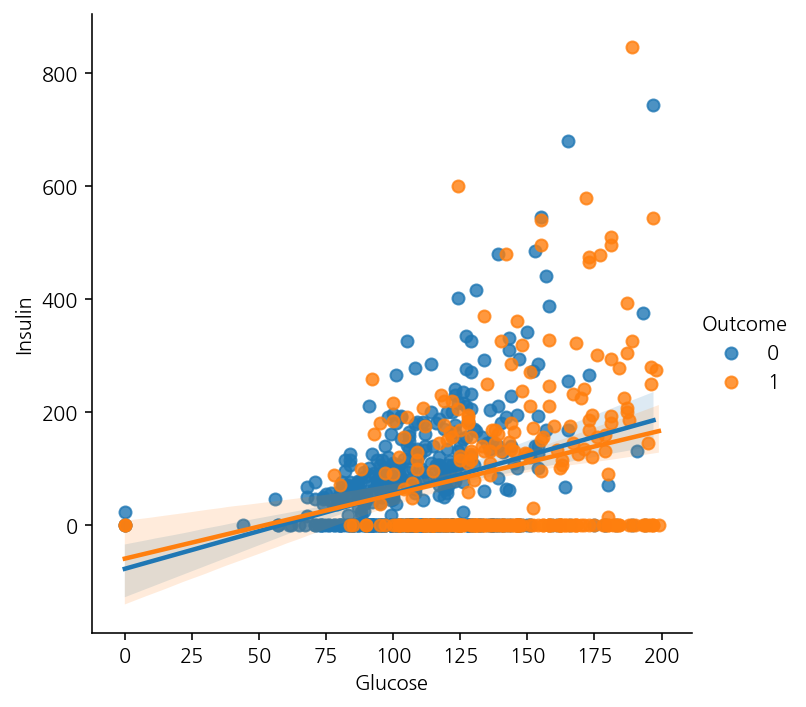

In [49]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

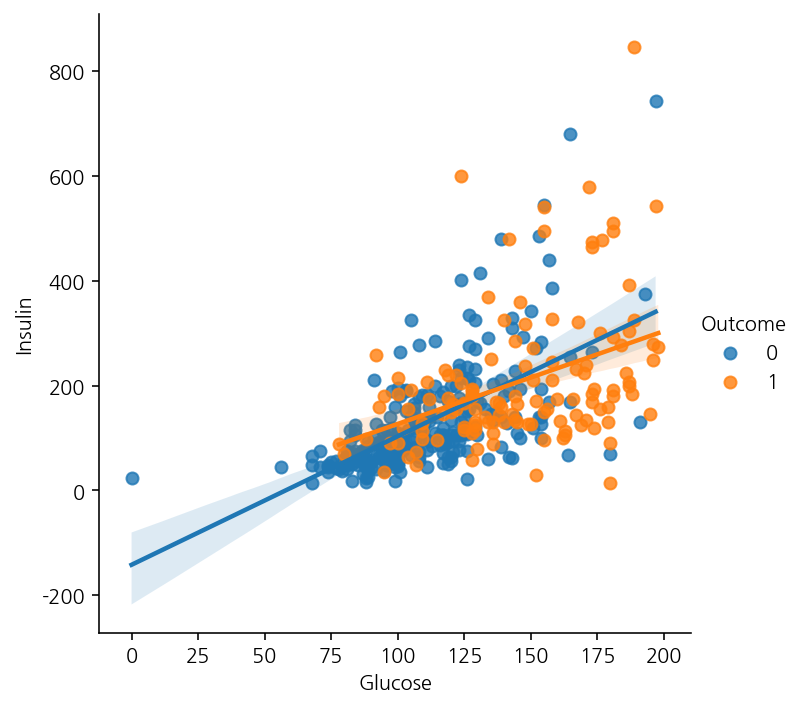

In [50]:
# 인슐린이 0보다 큰 값만 가지고 옴

plt.rc('axes', unicode_minus=False)
sns.lmplot(data=df[df['Insulin']>0], x='Glucose', y='Insulin', hue='Outcome')

#### pairplot : 모든 변수에 대해

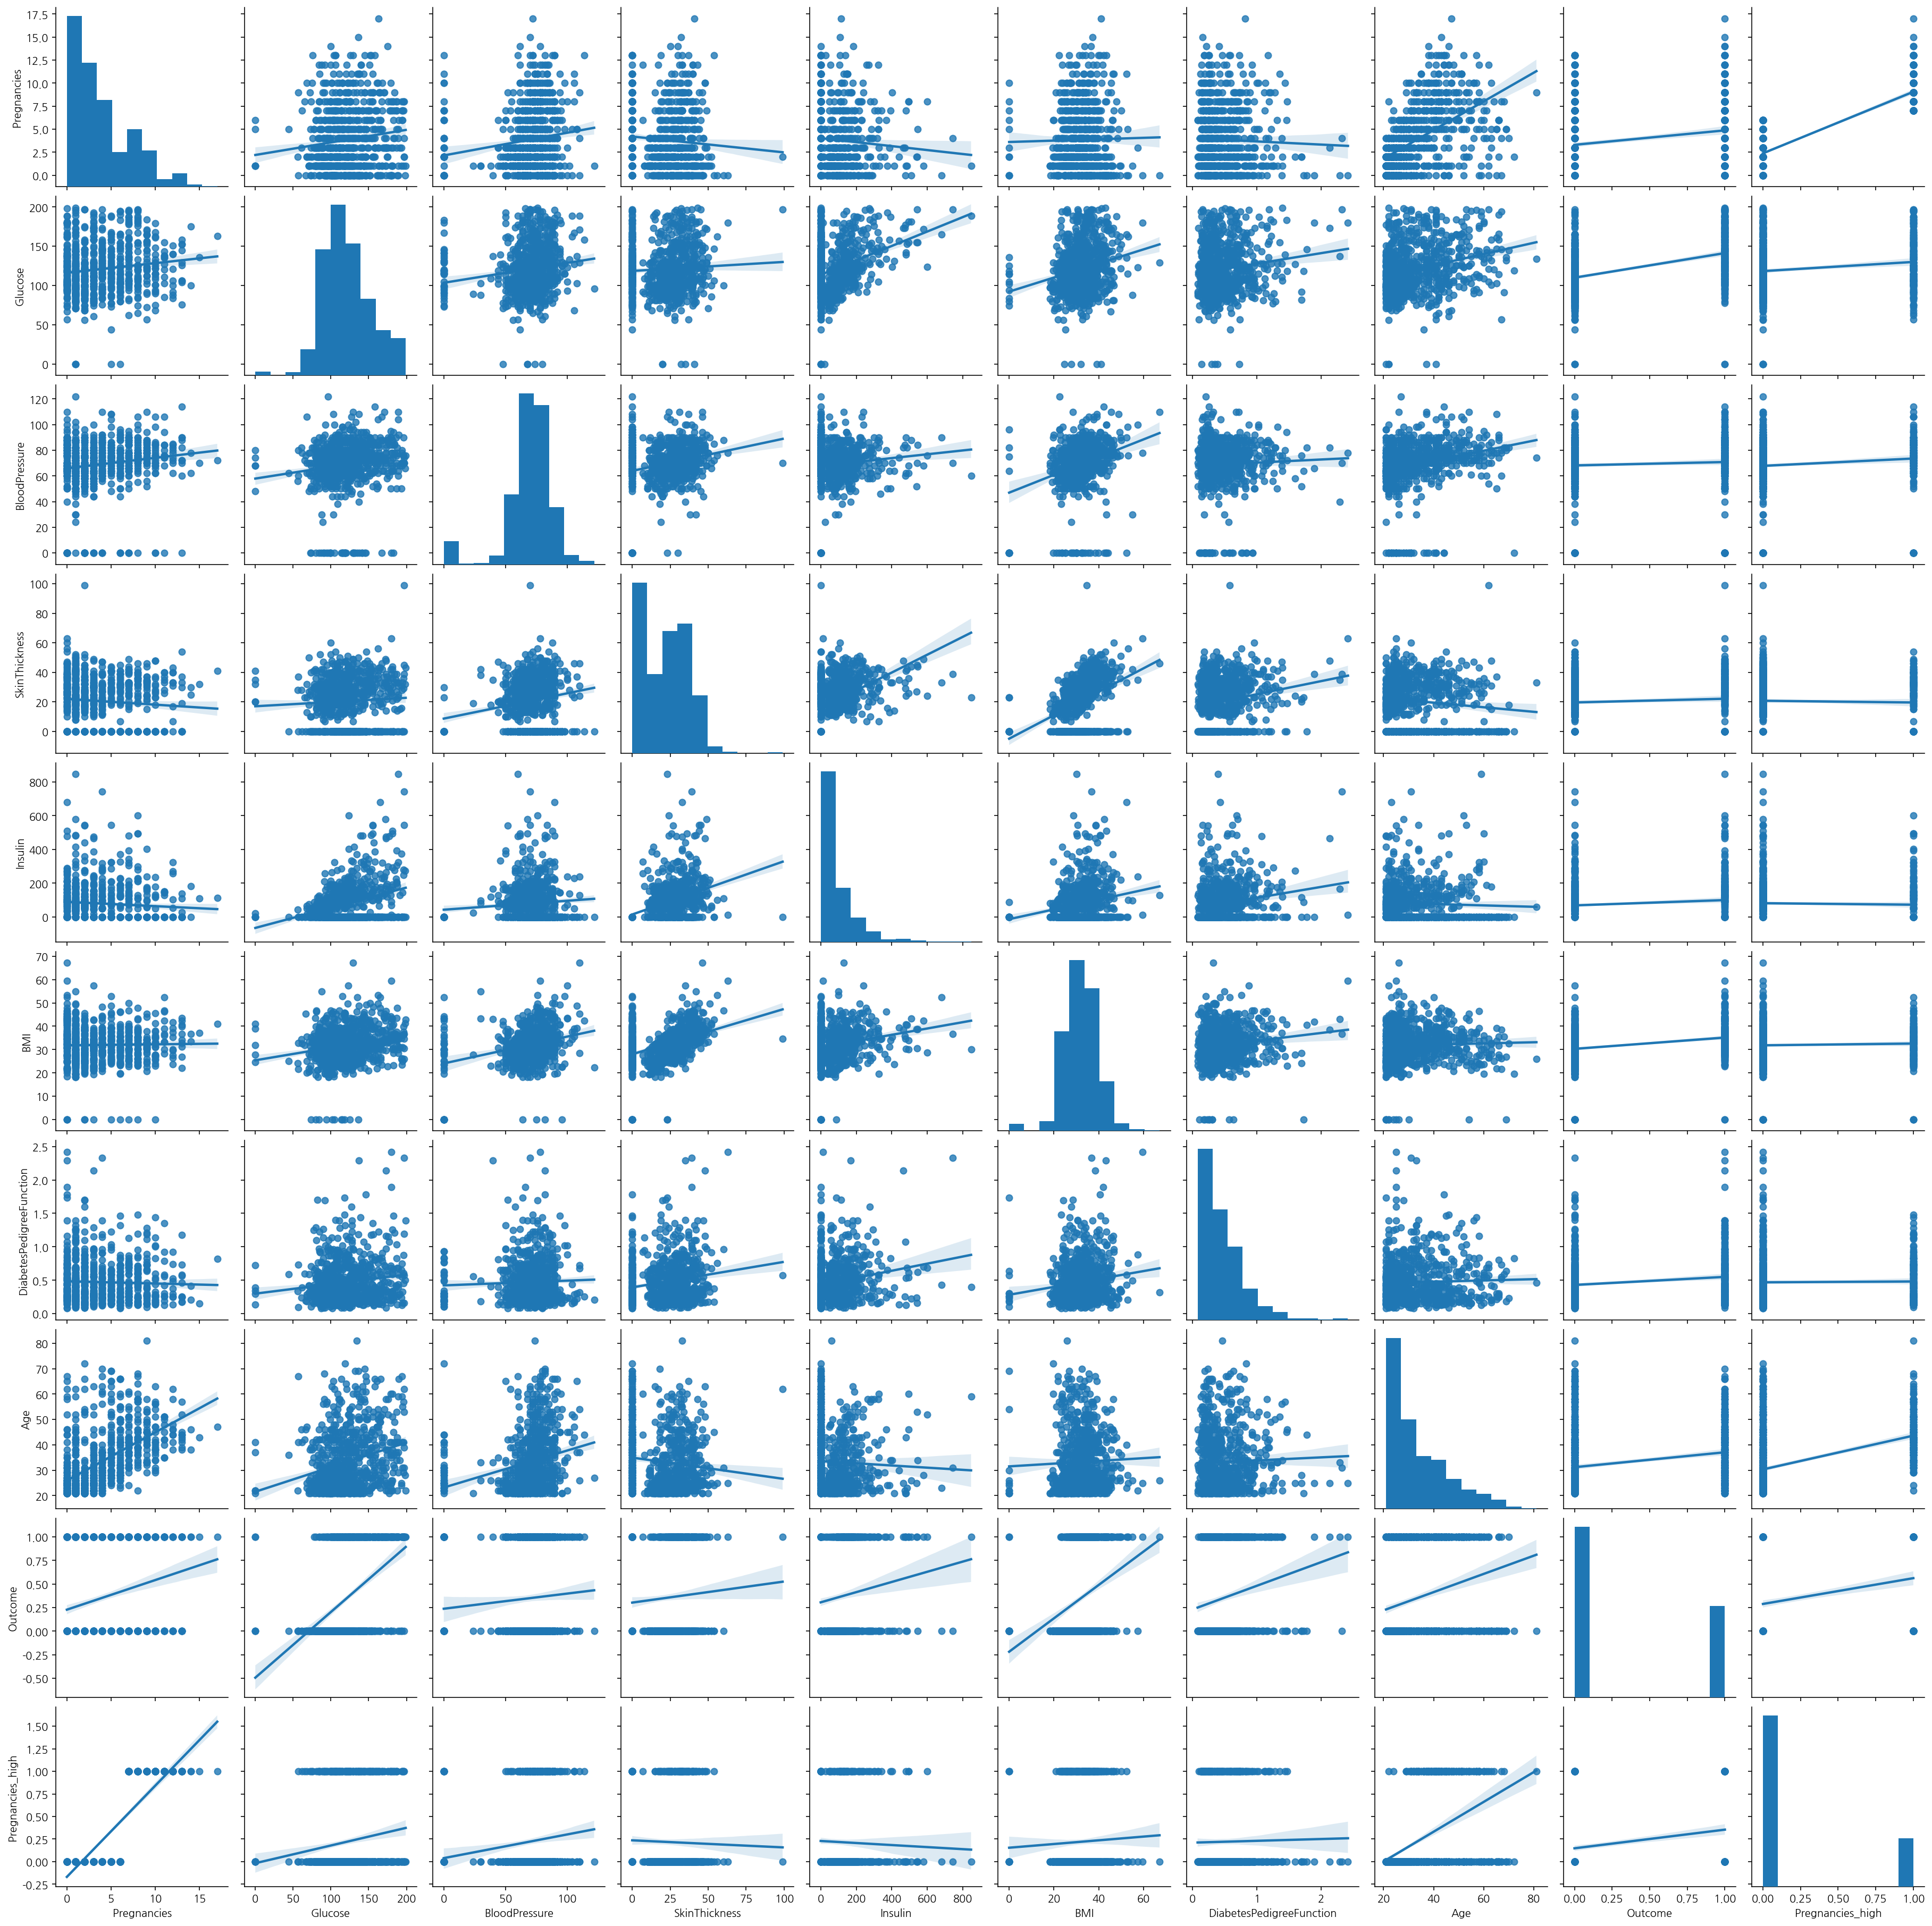

In [51]:
sns.pairplot(df, kind="reg")

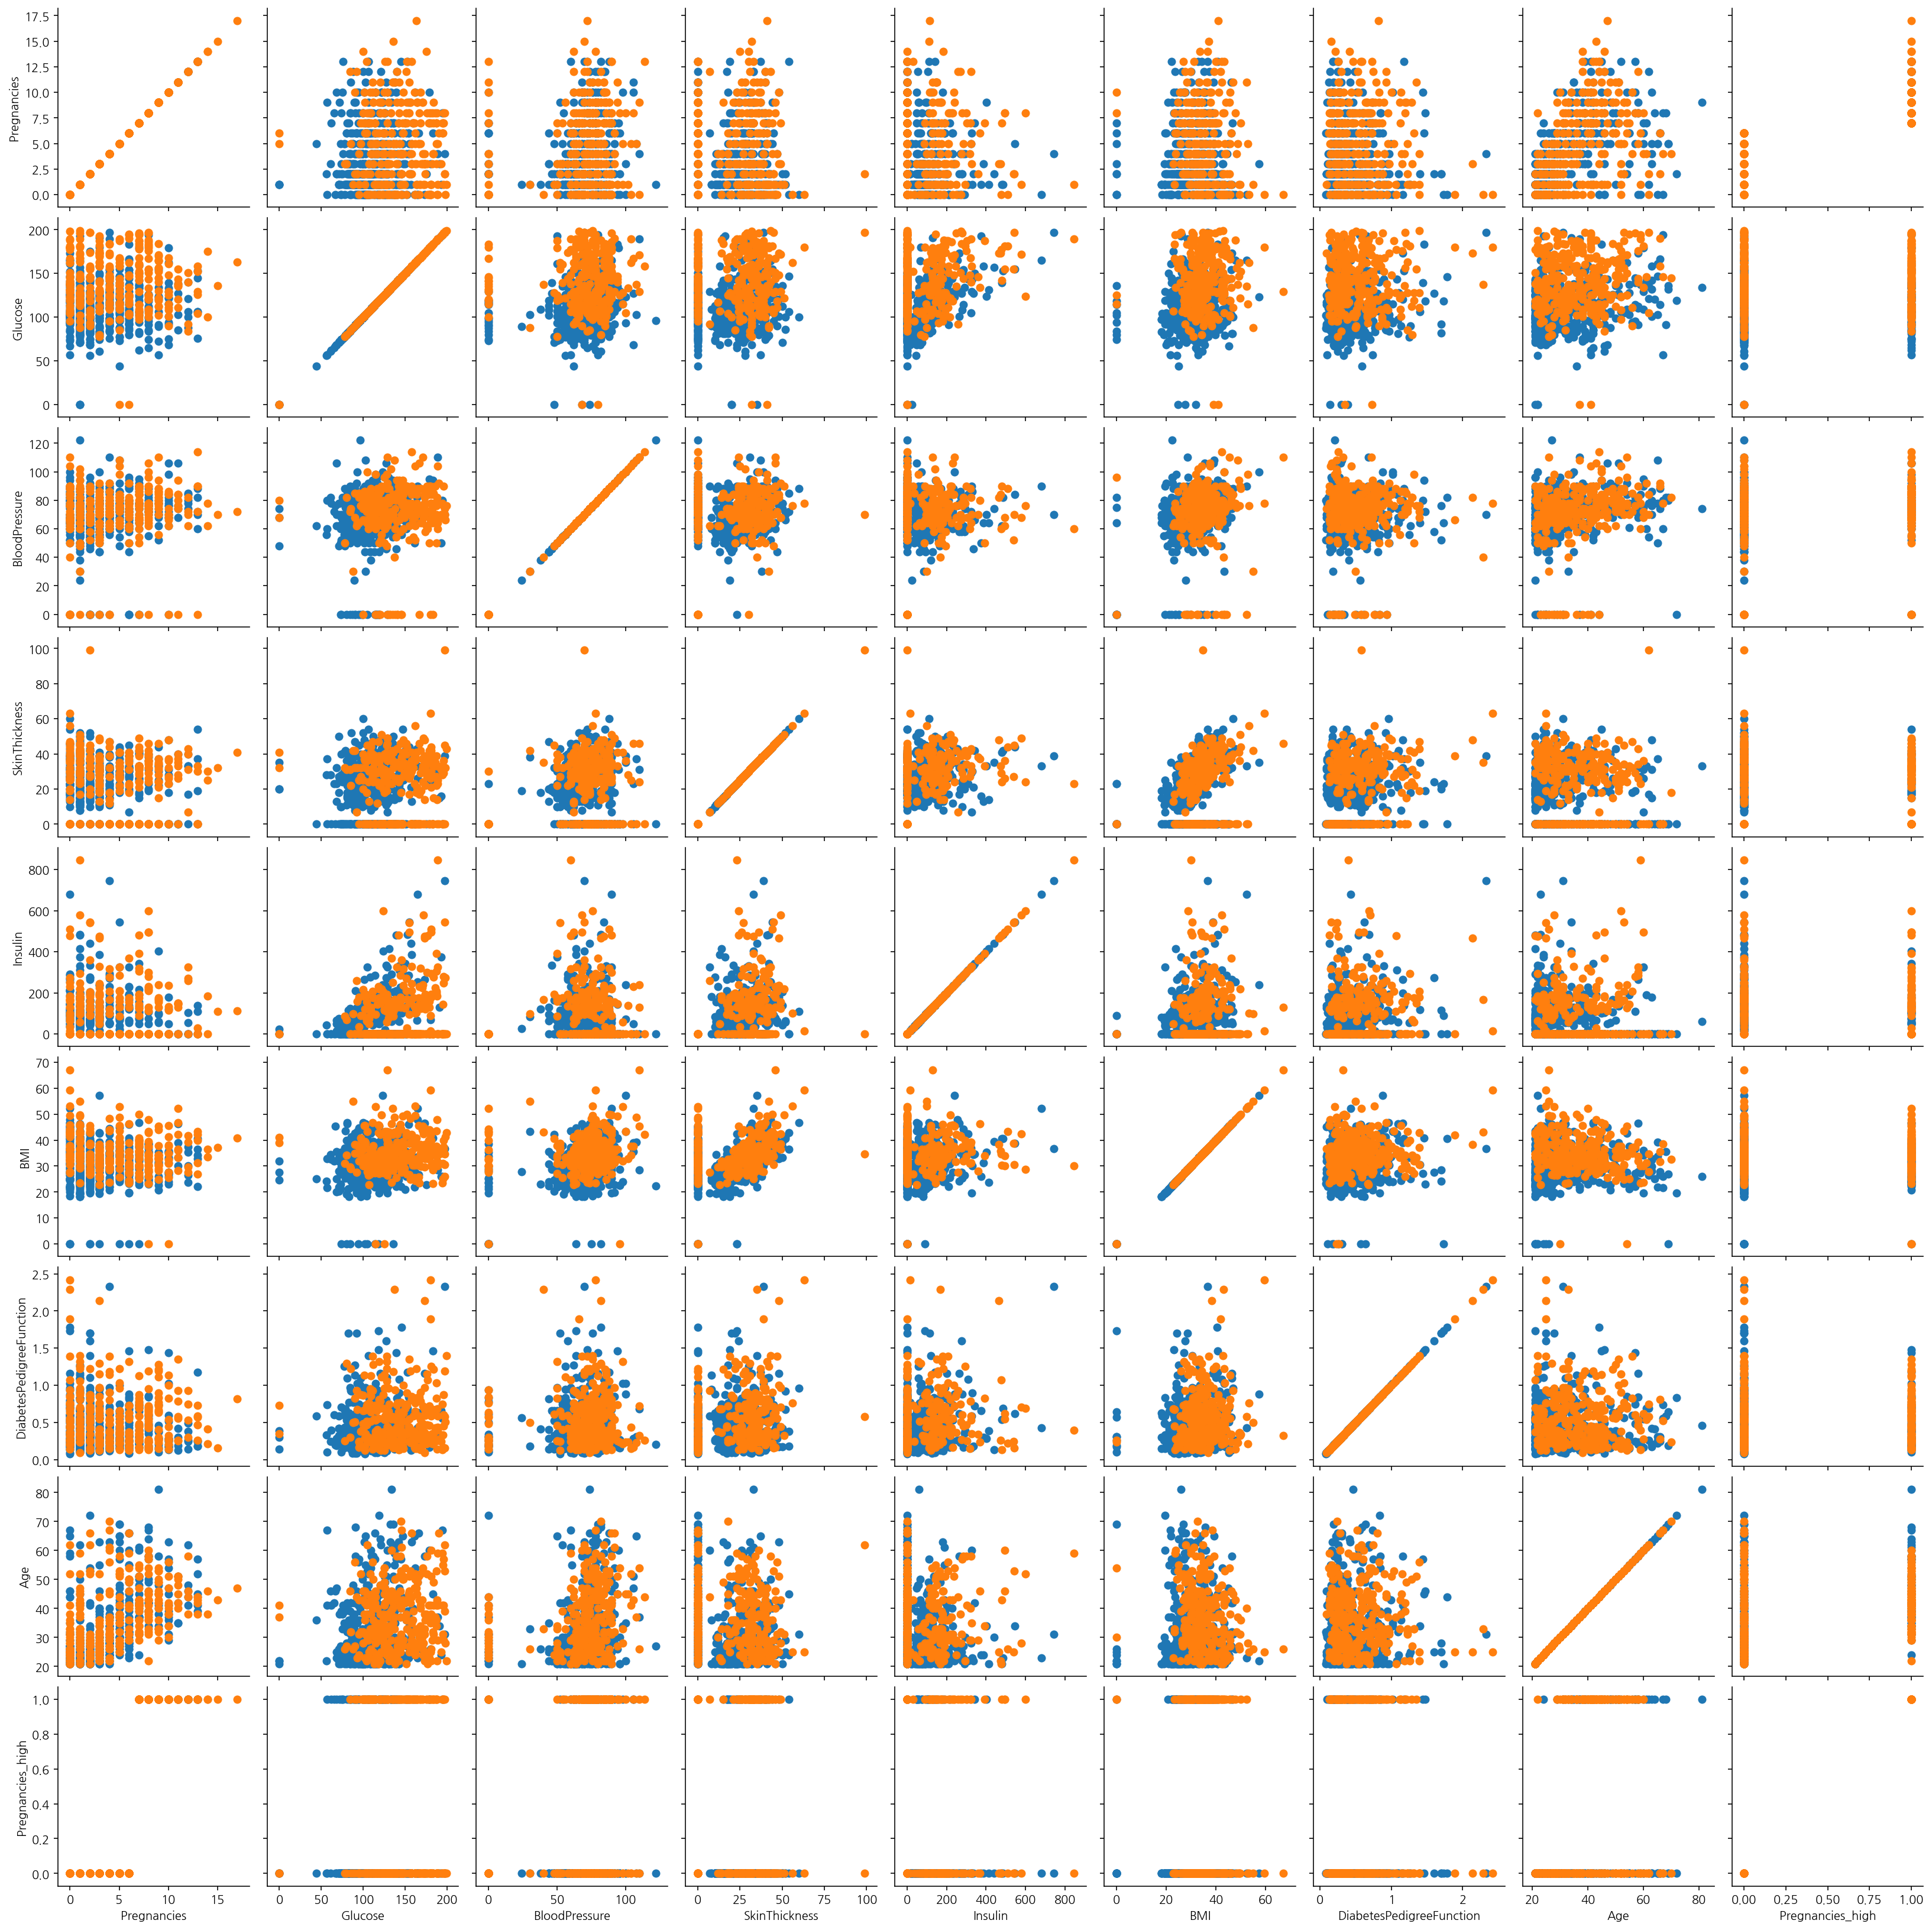

In [52]:
# Outcome에 따라 차이가 있어뵈는 것들이 있다.

g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

## 상관분석

In [53]:
# 결측치 처리 전
df_corr = df.corr()
df_corr.style.background_gradient()

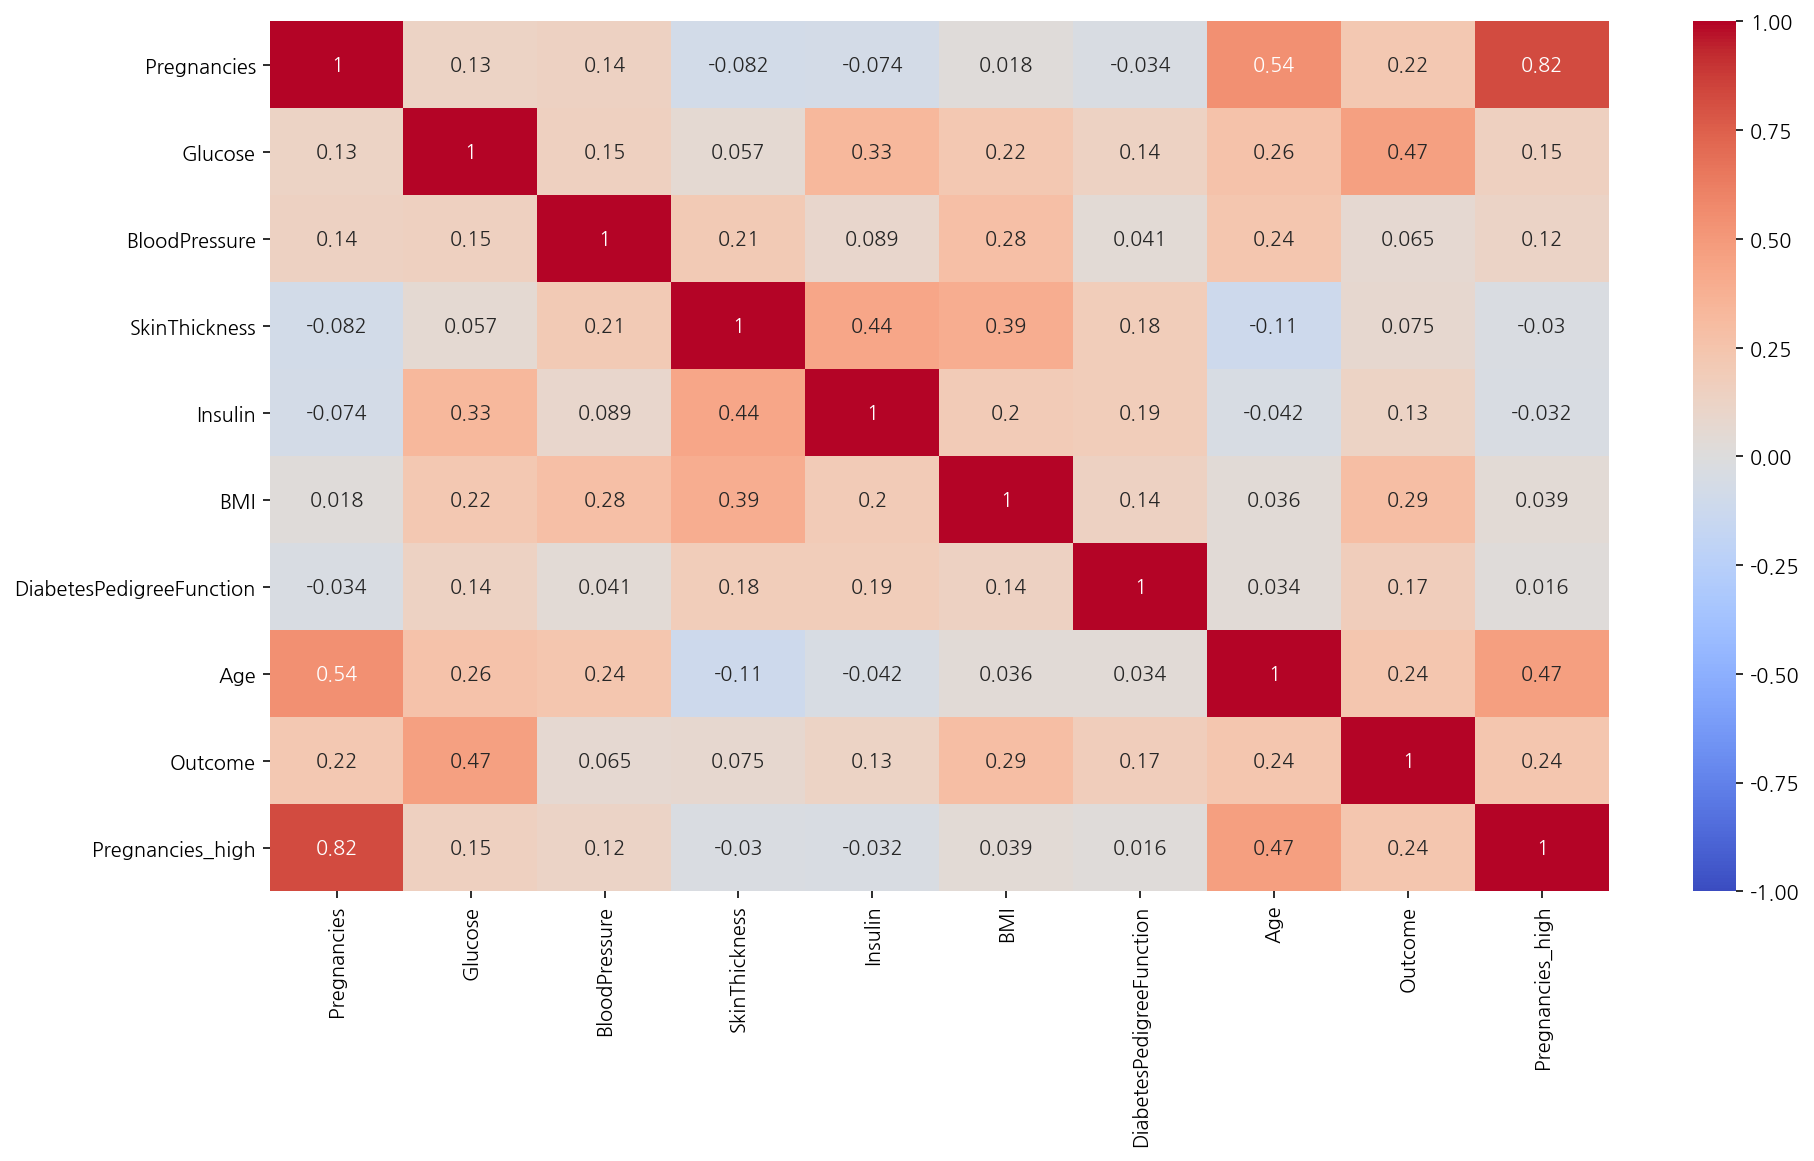

In [54]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="coolwarm", annot=True)

In [55]:
# 결측치 처리 후

df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome']=df['Outcome']
df_matrix.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      NaN  33.6   
1          1.0     85.0           66.0           29.0      NaN  26.6   
2          8.0    183.0           64.0            NaN      NaN  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          NaN    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [56]:
df_corr = df_matrix.corr()
df_corr.style.background_gradient()

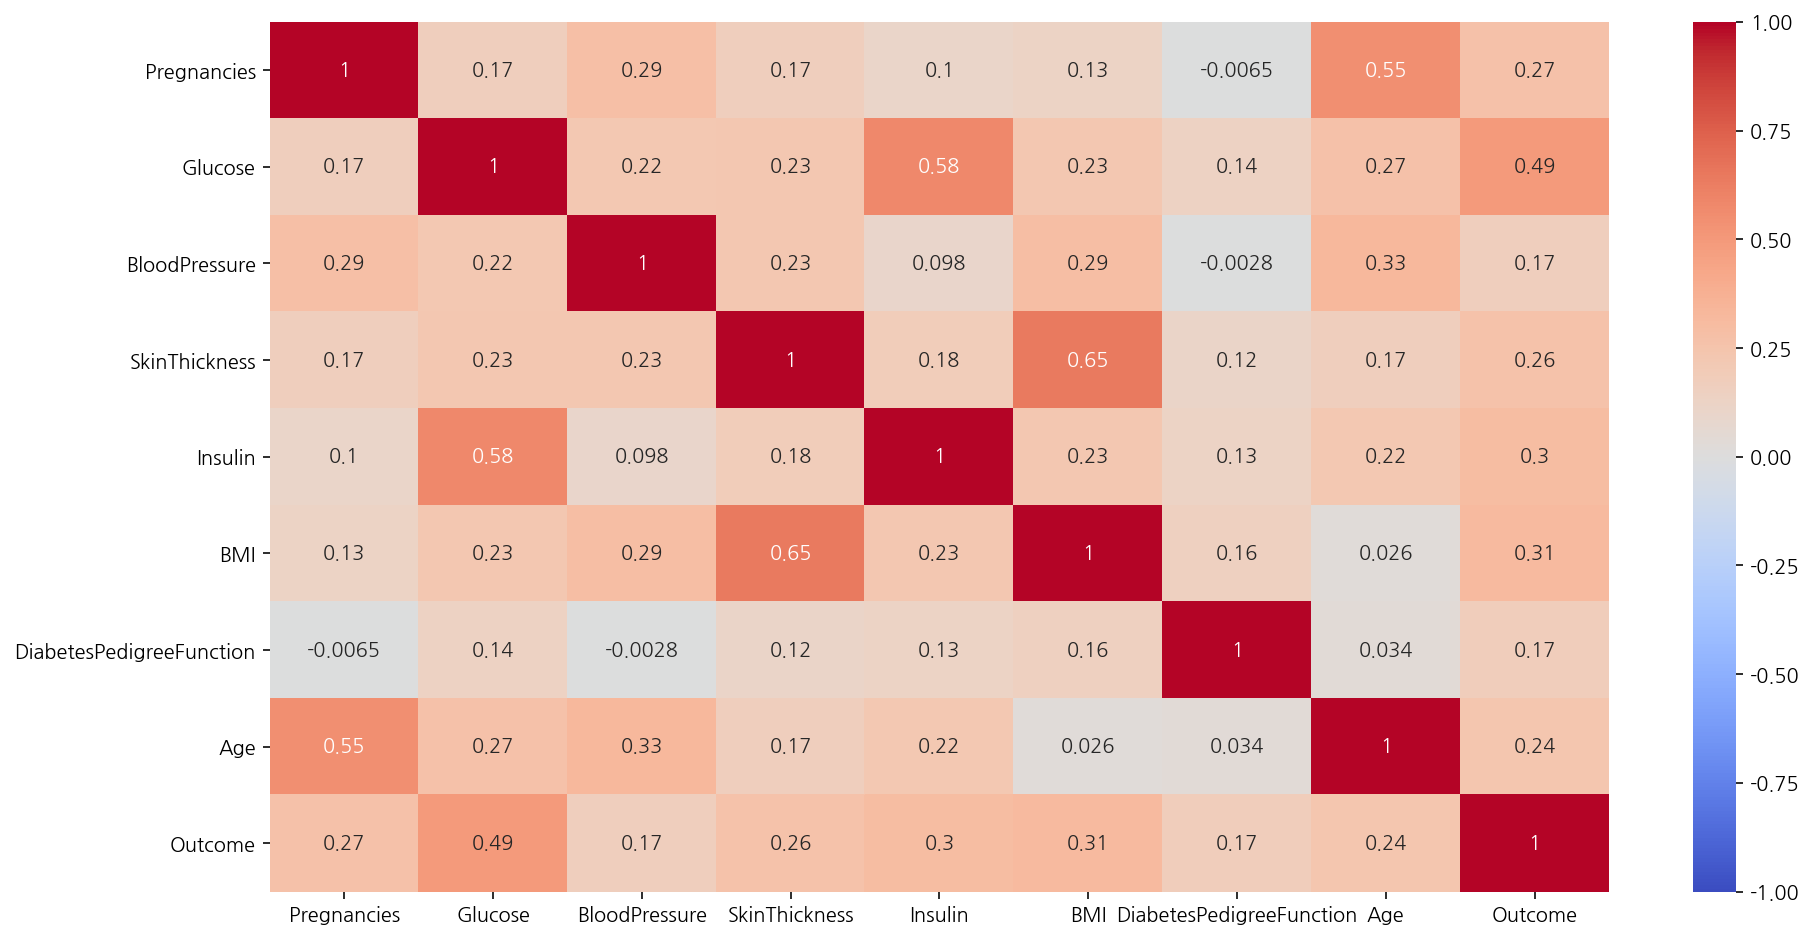

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr, vmax=1, vmin=-1, cmap="coolwarm", annot=True)

In [58]:
# Outcome 수치에 대한 상관계수만 모아서 본다.

df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### 상관계수가 높은 변수끼리 보기

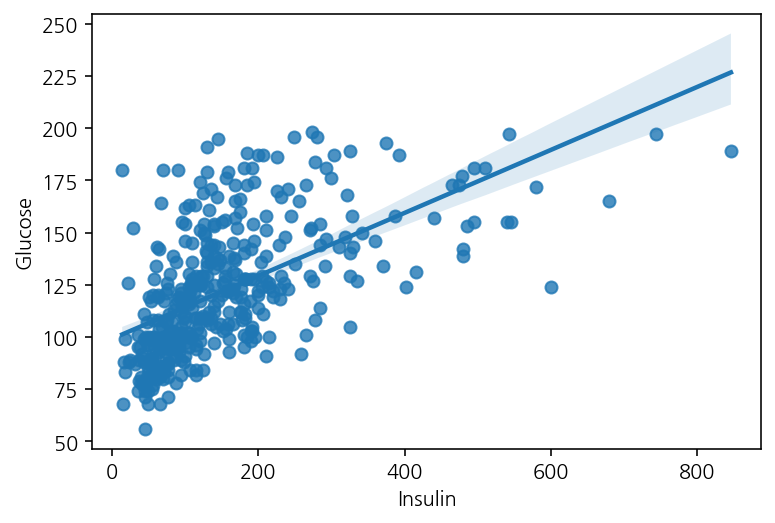

In [59]:
# 결측치 후

# 이상치 값들도 많이 보임.

sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

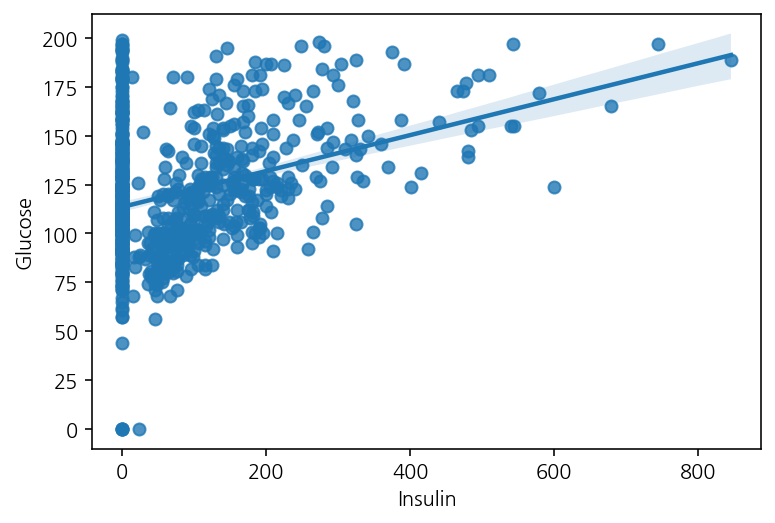

In [60]:
# 결측치 전에 0값 짱많을때

sns.regplot(data=df, x='Insulin', y='Glucose')

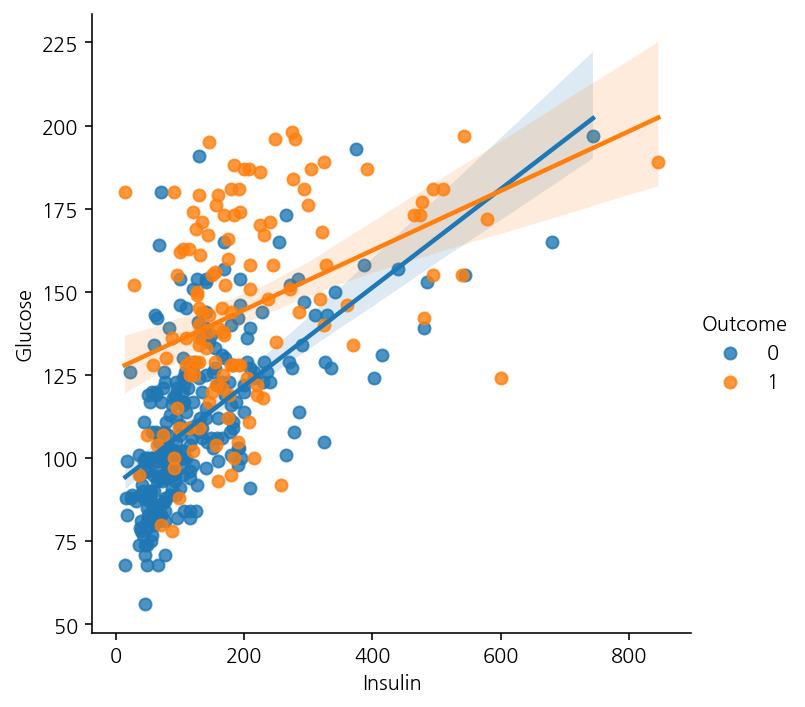

In [62]:
# Insulin100부근? 에서는 Outcome 0 밀집 확인가능.
sns.lmplot(data=df_matrix, x='Insulin', y='Glucose', hue='Outcome')

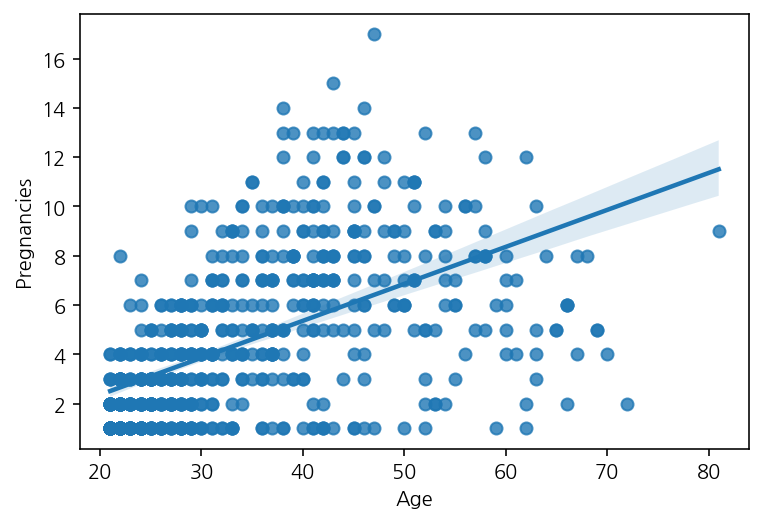

In [63]:
# 이상치 확인, 어떻게 처리할 것인지

sns.regplot(data=df_matrix, x='Age', y='Pregnancies')

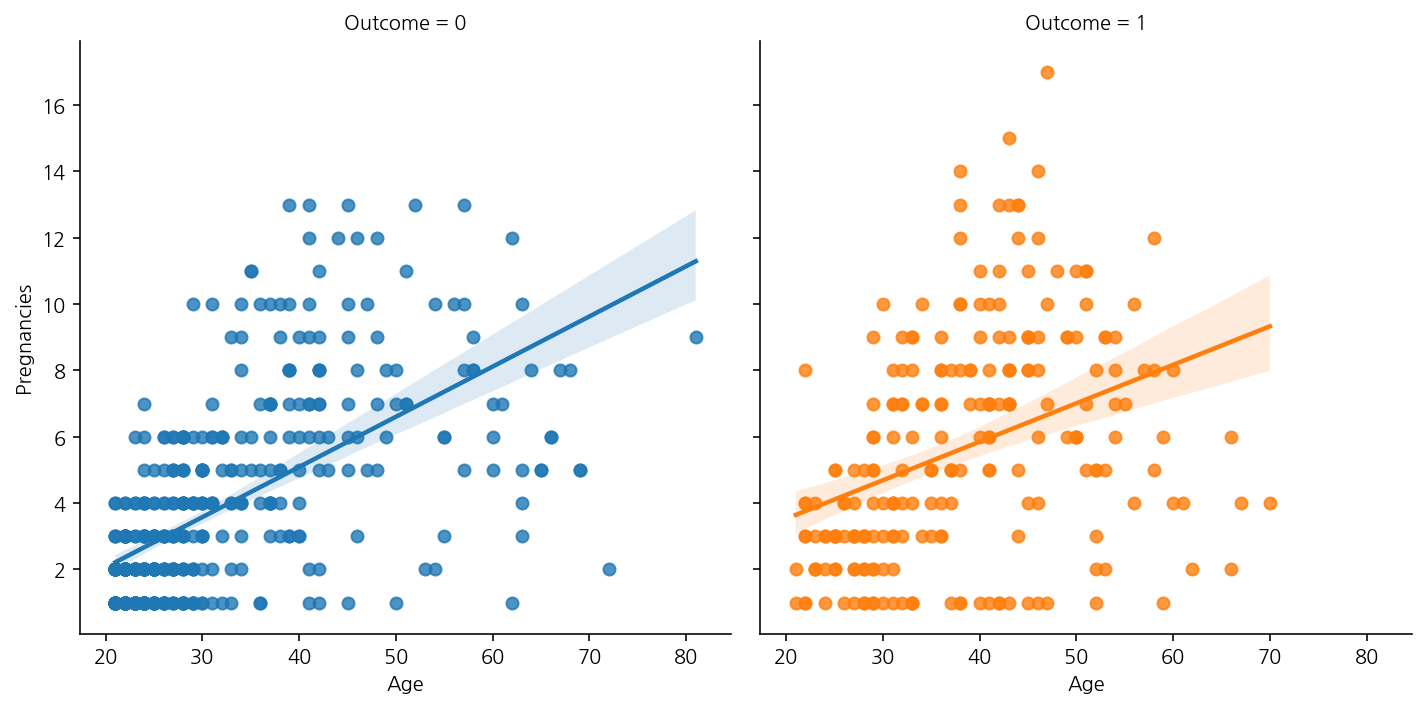

In [64]:
sns.lmplot(data=df_matrix, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')